<h2 style='text-align:center;font-size:80px;background-color:purple;border:80px;color:white'> Global Power Plant Report. <h2>

# Description:-

**The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.**

--------------

# Key attributes of the database:--

### The database includes the following indicators:

- **`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]**
- **`country_long` (text): longer form of the country designation**
- **`name` (text): name or title of the power plant, generally in Romanized form**
- **`gppd_idnr` (text): 10 or 12 character identifier for the power plant**
- **`capacity_mw` (number): electrical generating capacity in megawatts**
- **`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)**
- **`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)**
- **`primary_fuel` (text): energy source used in primary electricity generation or export**
- **`other_fuel1` (text): energy source used in electricity generation or export**
- **`other_fuel2` (text): energy source used in electricity generation or export**
- **`other_fuel3` (text): energy source used in electricity generation or export**
- **`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available**
- **`owner` (text): majority shareholder of the power plant, generally in Romanized form**
- **`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form**
- **`url` (text): web document corresponding to the `source` field**
- **`geolocation_source` (text): attribution for geolocation information**
- **`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.**
- **`year_of_capacity_data` (number): year the capacity information was reported**
- **`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013**
- **`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014**
- **`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015**
- **`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016**
- **`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017**
- **`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018**
- **`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019**
- **`generation_data_source` (text): attribution for the reported generation information**
- **`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013**
- **`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014**
- **`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015**
- **`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016**
- **`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017**
- **`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013**
- **`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014**
- **`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015**
- **`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016**
- **`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017**

### In this dataset we need to make two predictions

- **Fuel Type**

- **capacity_mw**

**Here fuel type is Primary Fuel**

- **`capacity_mw (number)`: electrical generating capacity in megawatts ,so this is regression problem and we will go 1st with capacity_mw**

- **`Fuel Type (Primary Fuel)` : It is a classification problem and we will do it after doing Regression**

# -----------------------------------------------------------------------------------

In [1]:
import pandas as pd 
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now lets Load the dataset

df=pd.read_csv('global_power_plant.csv')
pd.set_option("display.max_columns",None)

df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Here we have 907 rows and 27 columns ...
**Lot of irrelevent columns are also present such as other_fuel2,year_of_capacity_data,generation_data_source,other_fuel3,wepp_id ,etc.**

**capacity_mw is in continous format which means it is a Regression problem**

In [3]:
df.shape

(907, 27)

In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
690,IND,India,SANJAY BHABA,IND0000391,120.0,31.2642,78.4835,Hydro,NaN,NaN,NaN,1989.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,542.36455,0.000,186.4630,490.92305,586.4729,NaN,Central Electricity Authority,NaN
575,IND,India,PARBATI-III,IND0000326,520.0,31.7398,77.2576,Hydro,NaN,NaN,NaN,2014.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,657.47610,639.785,679.0676,706.97735,605.2585,NaN,Central Electricity Authority,NaN
779,IND,India,Supe Solar Power Plant,WRI1026214,2.0,18.3198,74.3686,Solar,NaN,NaN,NaN,NaN,Clover Solar Private Limited (CSPL),Clover Solar Private Limited (CSPL),http://www.cloversolar.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,IND,India,Rojhani Solar Power Plant,WRI1026199,30.5,23.7025,75.9246,Solar,NaN,NaN,NaN,NaN,Ujaas Energy Limited,Ujaas Energy Limited,http://ujaas.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,IND,India,NEYVELI ST I,IND0000298,600.0,11.5893,79.4704,Coal,Oil,NaN,NaN,1966.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3193.10100,2776.947,3256.8510,2939.88800,2691.1140,NaN,Central Electricity Authority,NaN


## We can see  that there are lot of which are having NaN values such as primary_fuel	other_fuel1	other_fuel2	,	year_of_capacity_data	,generation_gwh_2013	,generation_gwh_2014	,generation_gwh_2015	,generation_gwh_2016	,generation_gwh_2017	,generation_gwh_2018	,generation_gwh_2019	,generation_data_source	,estimated_generation_gwh, etc.

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
# Now lets identify which types of data types do they all belongs

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

#### Columns are of object and float 64 types ..But our target variable is in float 64 (capacity_mw)

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:white'> EDA <h2>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

### Here we get to know the dtype ,NoN NuLL counts, columns and memory usage .. Here we see that there are lot Null Values in the dataset ,so lets fill those null values using imputer

# NOW LETS CHECK THE NULL VALUES

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- **`These are the columns which are having Null Values Which are needed to be corrected :-` latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,owner,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh..**

- **`Here we also come to the conclusion that many columns have more than 50% of the missing data and in some places it is more than 95% too .. These missing values makes these columns as irrelevent for further Study`** 

- **`Both the target variables have 0 missing values`**

<AxesSubplot:>

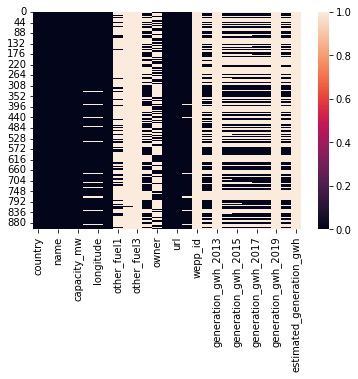

In [10]:
# Lets check is graphically
sns.heatmap(df.isnull())

### NOW LETS FILL THE MISSING VALUES PRESENT IN THE COLUMNS

In [11]:
# Filling the missing values using Fillna method and using mean , median and mode accordingly as per the columns reqirement
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["owner"] = df["owner"].fillna(df["owner"].mode()[0])
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())


# Here i am not filling nan in other fuel 2 and other fuel 3 because 100% of the data are null and irrelevent to fill

df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["year_of_capacity_data"] = df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].median())

# Here i am not filling nan in wep id generation_gwh_2013  and generation_gwh_2019   because 100% of the data are null and irrelevent to fill


In [12]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel2","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh","generation_gwh_2013","generation_gwh_2019"], axis=1, inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [13]:
#now lets see the null columns

df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

### We can see that all the columns are Having 0 Null values and Irrelevent columns have been deleted too..We still have 4 columns which are irrelevent we will delete it later 

<AxesSubplot:>

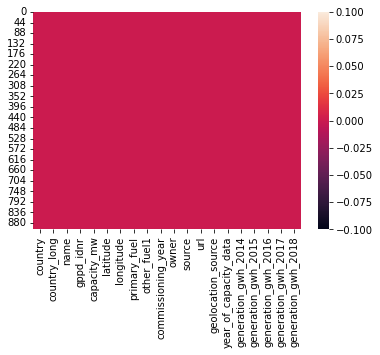

In [14]:
sns.heatmap(df.isnull())

## All the Null values have been Removed

In [15]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [16]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

## So here we know All the columns data are related for country india only

In [17]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

## Here we can see the IND full form also ,it India Only ..

In [18]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)
# So here we will be dropping these 2 columns bcz we know now that all these input data's are for India ony

### 3 more irrelevent columns which wont contribute to label

In [19]:
df.drop("owner",axis=1,inplace=True)

In [20]:
df.drop("url",axis=1,inplace=True)

In [21]:
# character Indentifier of power plant is alsonot a necessary column

df.drop("gppd_idnr",axis=1,inplace=True)

In [22]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


### We will delete Name columns later after doing visualization`

In [23]:
df['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [24]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [25]:
df['capacity_mw'].value_counts()
# value count of target variable

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

#### There are different values counts inside capacity_mw and it is all continuous data 

In [26]:
df['primary_fuel'].value_counts()
# this is target variable for regression problem

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

## We can see  that maximum of the powerplant in India is runned by Coal and Hyro(water) as a fuel

In [27]:
#  Lets Remove Duplicates Values from the dataframe

df.drop_duplicates(keep='first',inplace=True)

In [28]:
# Checking wheather target variable contains any space
df.loc[df['capacity_mw']==" "]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018


### So in this target variable we dont have space value present inside this

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> A. Univariate Analysis <h2>

In [29]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

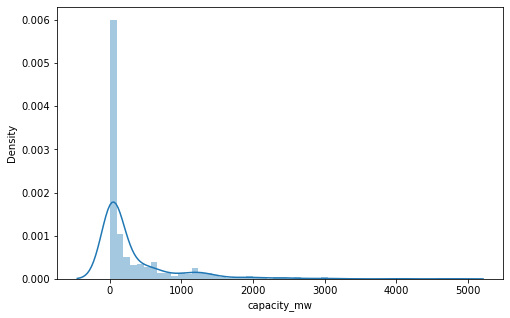

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(df['capacity_mw'])

### We can see our taget variable is left Skewed

<AxesSubplot:xlabel='latitude', ylabel='Density'>

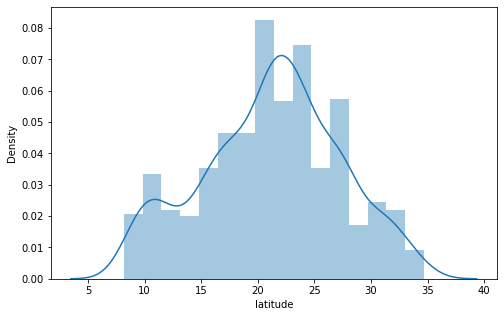

In [31]:
plt.figure(figsize=(8,5))
sns.distplot(df['latitude'])

### Our Latitude columns seems to be normally distributed 

<AxesSubplot:xlabel='longitude', ylabel='Density'>

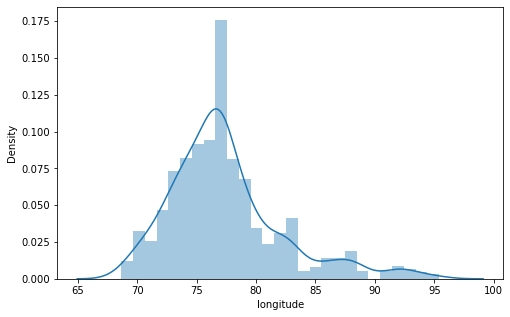

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(df['longitude'])

### Our longitude column is bit left skewed

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

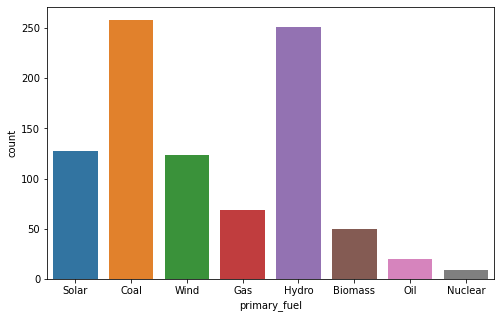

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(df['primary_fuel'])

### Here we can see that the maximum power plant use Coal and Hydro as fuel and the least is taken as Nuclear

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

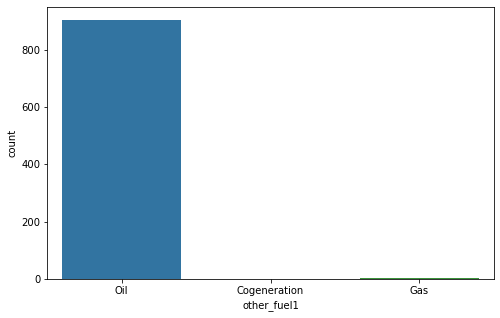

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(df['other_fuel1'])

### The other fuel used in a power plant in maximum number is Oil and the least is gas and congenration

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

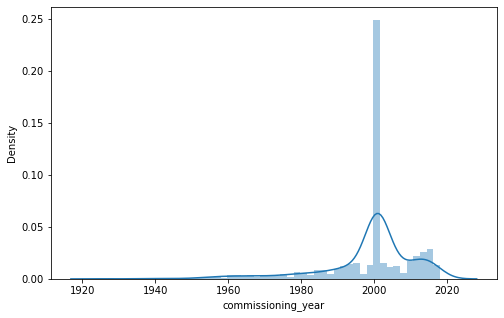

In [35]:
plt.figure(figsize=(8,5))
sns.distplot(df['commissioning_year'])

### Here the commissioning year columns is right skewed and seems like most of the power plant were started operating from year 2000 

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

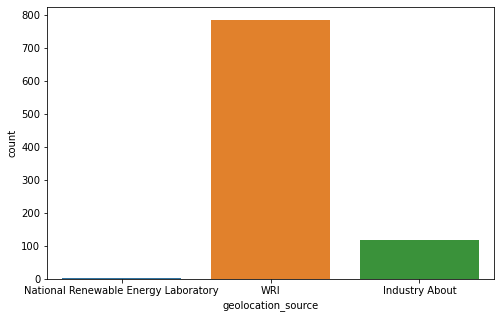

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])

## the maximum attribution of geolocation information is from WRI geolocation source and least is from National Renewable laboratory

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

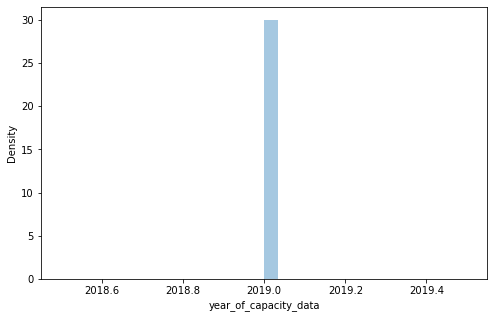

In [37]:
plt.figure(figsize=(8,5))
sns.distplot(df['year_of_capacity_data'])

In [38]:
df['year_of_capacity_data'].value_counts()

2019.0    907
Name: year_of_capacity_data, dtype: int64

### SO here it is clear that we are having only one data in year of capacity data column which mean all of the data were recorded in 2019.. It has only one data which will not contribute to target variable ,so we can think of dropping the columns

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

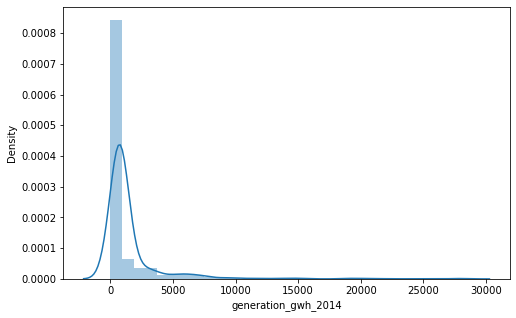

In [39]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2014'])

In [40]:
df['generation_gwh_2014'].mean()

1516.6899563099648

### So we can see that the average genaration of gigawatt-hours in 2014 was 1517 

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

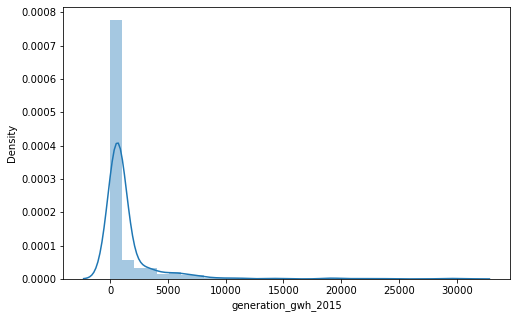

In [41]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2015'])

In [42]:
df['generation_gwh_2015'].mean()

1510.0712958331865

### we can see that the average genaration of gigawatt-hours in 2015 was 1510 which is little less than 2014

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

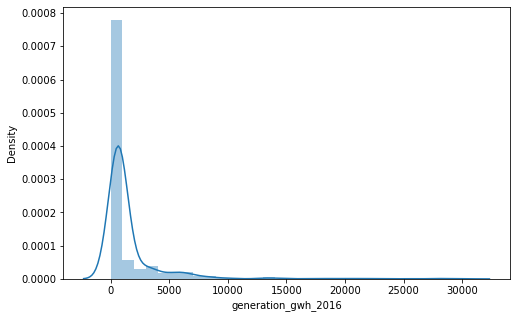

In [43]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2016'])

In [44]:
df['generation_gwh_2016'].mean()

1565.3613831285058

### we can see that the average genaration of gigawatt-hours in 2016 was 1565 which is more than 2014 and 2015

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

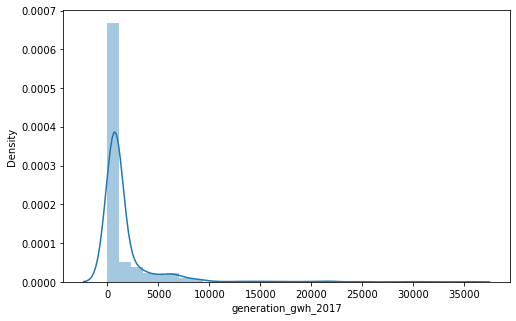

In [45]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2017'])

In [46]:
df['generation_gwh_2017'].mean()

1657.1217968406709

### In 2017 the average genration of electricity is 1657 and it more than the previous 3 years

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

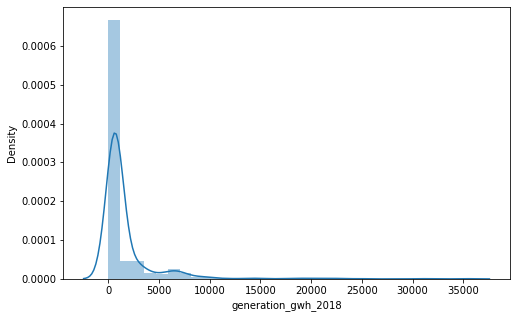

In [47]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2018'])

In [48]:
df['generation_gwh_2018'].mean()

1665.0110301274244

## In 2018 the average genration of electricity is 1665 and it more than the all previous year

## the max average genration of electricity was in 2018

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> B. Bivariate Analysis <h2>

In [49]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

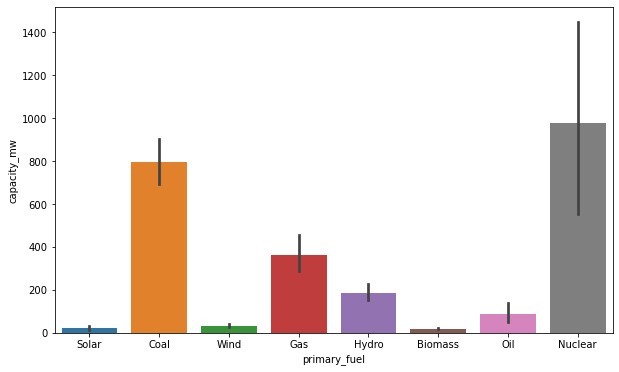

In [50]:
#Lets check the relation between primary Fuel and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

**The maximum megawatt of electricity can be produced by `Nuclear` followed by `Coal` and the least is `Biomass ,solar and wind`**

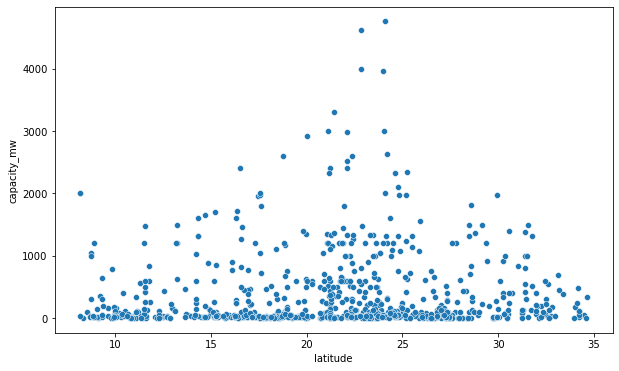

In [51]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

### We can see that at latitude 16 to 28 capacity of magawatt seem to be the highest

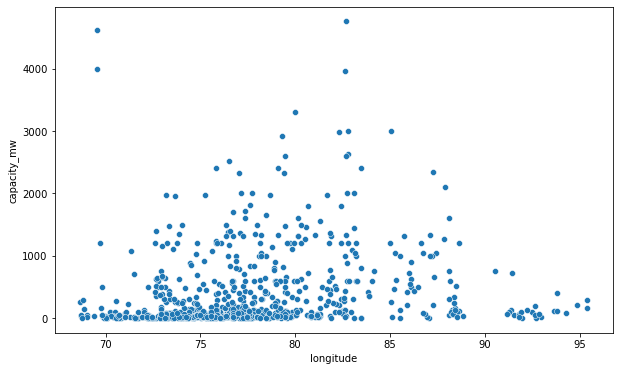

In [52]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

### We can see that at longitude 75 to 83 capacity of magawatt seem to be the highest 

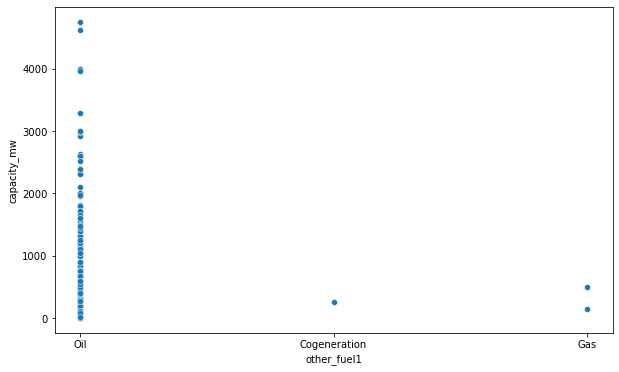

In [53]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "other_fuel1", y = "capacity_mw", data = df)
plt.show()

### We can see that in case of other fuel -Oil has the maximum capacity of producing electricity in megawatt and the least is congenration

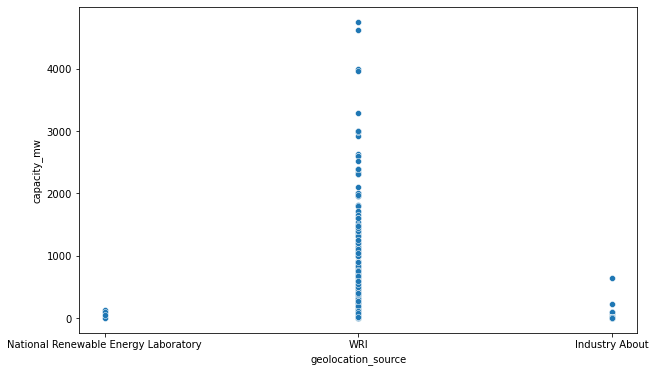

In [54]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

### Maximum megawatt is produced by WRI ,This may be possible because maximum of the geolocation source power plant is from WRI

Max Genration -> 28127.0
Min Genration -> 0.0
Average Genration -> 1516.6899563099648


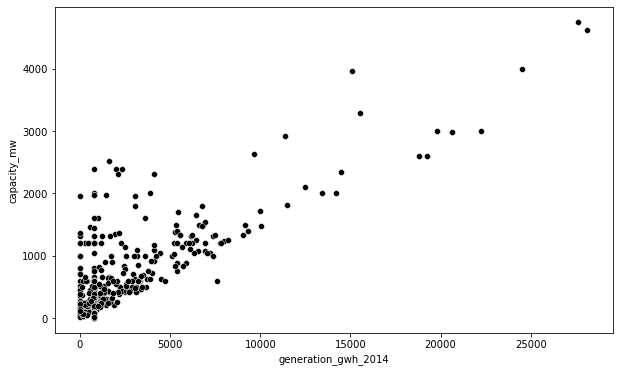

In [55]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",color="black", data = df)
print ('Max Genration ->' ,df['generation_gwh_2014'].max())
print ('Min Genration ->' ,df['generation_gwh_2014'].min())
print ('Average Genration ->' ,df['generation_gwh_2014'].mean())


plt.show()

### We have the max generation of electricity in 2014 which is 28127.0 mw and the average generation which is 1517 mw ..This showes the Linear Relationship between generation_gwh_2014 and capacity_mw (input and Output)

Max Genration -> 30539.0
Min Genration -> 0.0
Average Genration -> 1510.0712958331865


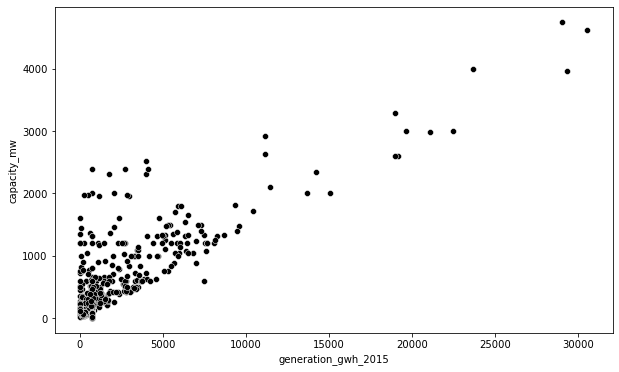

In [56]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw",color="black", data = df)
print ('Max Genration ->' ,df['generation_gwh_2015'].max())
print ('Min Genration ->' ,df['generation_gwh_2015'].min())
print ('Average Genration ->' ,df['generation_gwh_2015'].mean())


plt.show()

### We have the max generation of electricity in 2015 which is 30539.0 mw and the average generation which is 1510 mw ..This showes the Linear Relationship between generation_gwh_2015 and capacity_mw (input and Output)

Max Genration -> 30015.0
Min Genration -> 0.0
Average Genration -> 1565.3613831285058


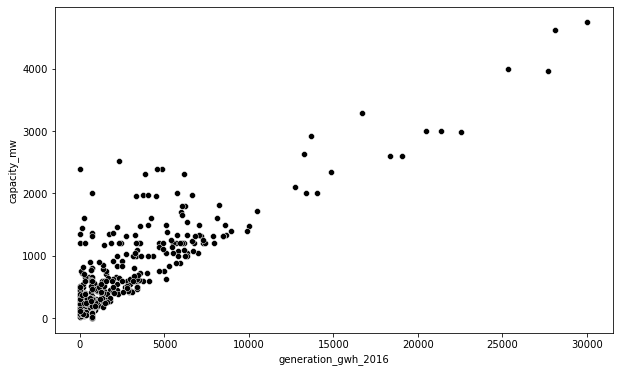

In [57]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw",color="black", data = df)
print ('Max Genration ->' ,df['generation_gwh_2016'].max())
print ('Min Genration ->' ,df['generation_gwh_2016'].min())
print ('Average Genration ->' ,df['generation_gwh_2016'].mean())


plt.show()

###  the max generation of electricity in 2016 which is 30015.0 mw and the average generation which is 1565 mw ..This showes the Linear Relationship between generation_gwh_2016 and capacity_mw (input and Output)

Max Genration -> 35116.0
Min Genration -> 0.0
Average Genration -> 1657.1217968406709


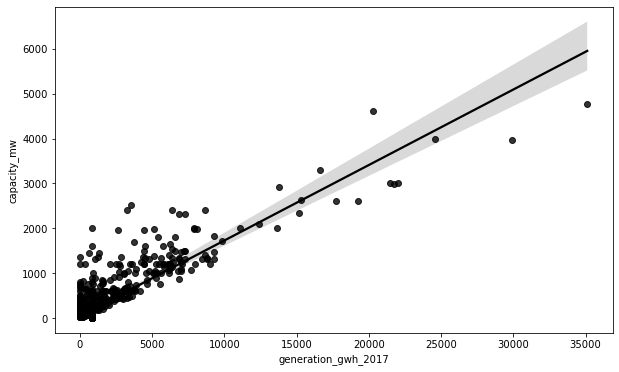

In [58]:
plt.figure(figsize = (10,6))
sns.regplot(x = "generation_gwh_2017", y = "capacity_mw",color="black", data = df)
print ('Max Genration ->' ,df['generation_gwh_2017'].max())
print ('Min Genration ->' ,df['generation_gwh_2017'].min())
print ('Average Genration ->' ,df['generation_gwh_2017'].mean())


plt.show()

### The max generation of electricity in 2017 which is 35116.0 mw and the average generation which is 1657 mw ..This showes the Linear Relationship between generation_gwh_2017 and capacity_mw (input and Output)¶

Max Genration -> 35136.0
Min Genration -> 0.0
Average Genration -> 1665.0110301274244


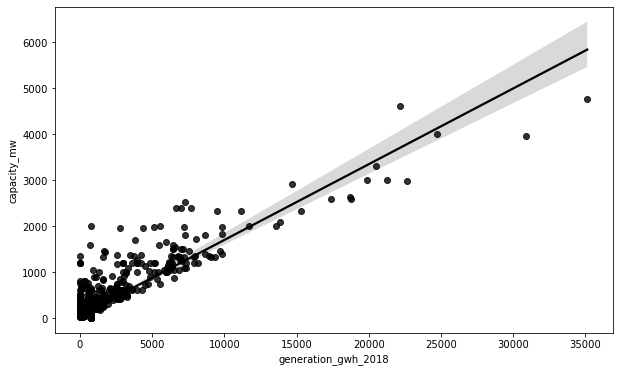

In [59]:
plt.figure(figsize = (10,6))
sns.regplot(x = "generation_gwh_2018", y = "capacity_mw",color="black", data = df)
print ('Max Genration ->' ,df['generation_gwh_2018'].max())
print ('Min Genration ->' ,df['generation_gwh_2018'].min())
print ('Average Genration ->' ,df['generation_gwh_2018'].mean())


plt.show()

### The max generation of electricity in 2018 which is 35136.0 mw and the average generation which is 1665 mw ..This showes the Linear Relationship between generation_gwh_2018 and capacity_mw (input and Output)

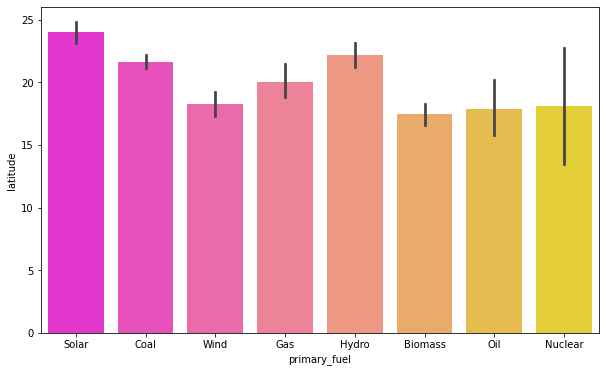

In [60]:
plt.figure(figsize = (10,6))
sns.barplot(x = "primary_fuel", y = "latitude", data = df,palette="spring")
plt.show()

### The Primary fuel Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

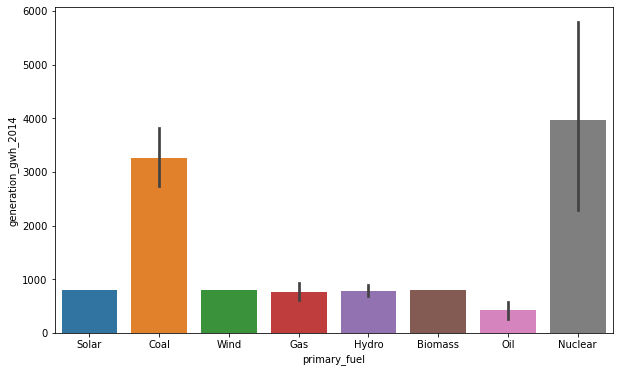

In [61]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)
plt.show()

**Here we can see that the maximum genration of electricity is through `Nuclear` followed by `Coal` and the least is by `Oil` in 2014 ..**

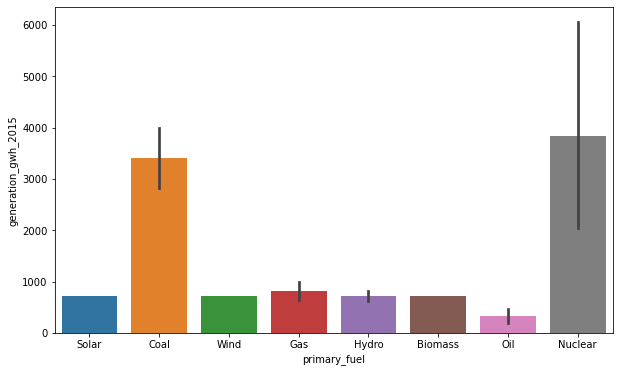

In [62]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)
plt.show()

### Here we can see that the maximum genration of electricity is through `Nuclear` followed by `Coal` and the least is by `Oil` in 2015 ..

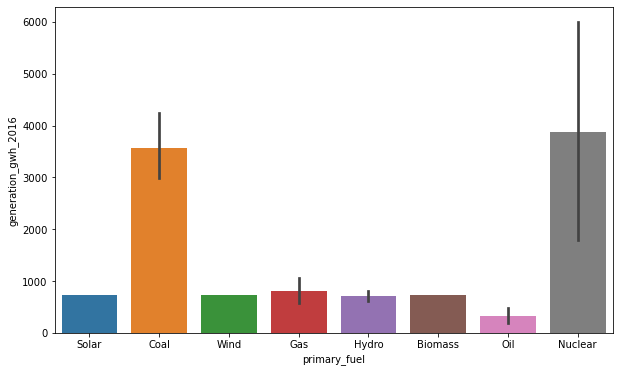

In [63]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)
plt.show()

### Here we can see that the maximum genration of electricity is through `Nuclear` followed by `Coal` and the least is by `Oil` in 2016 ..

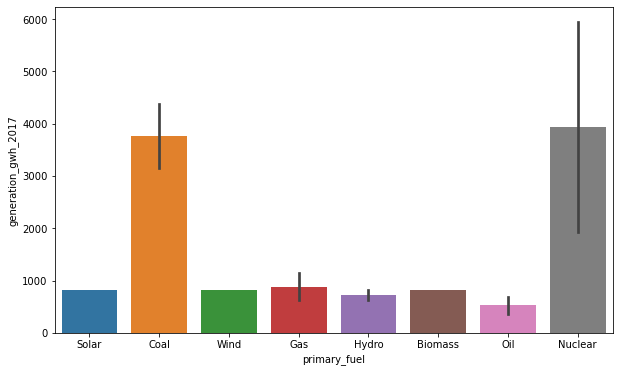

In [64]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df)
plt.show()

### Here we can see that the maximum genration of electricity is through `Nuclear` followed by `Coal` and the least is by `Oil` in 2017 ..but Here we analyze also that the use of has been increased in 2017 and its almost near to Nuclear.

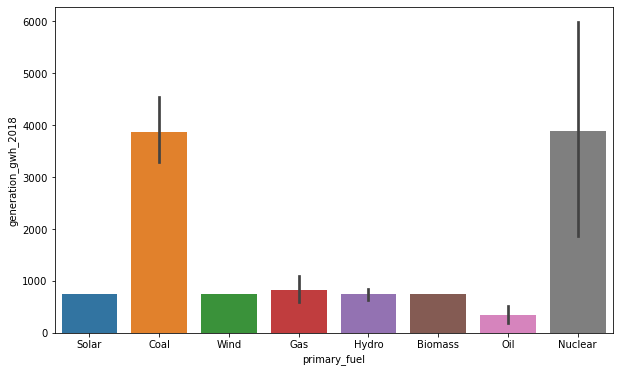

In [65]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)
plt.show()

### Here we can see that the maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2017 ..but Here we analyze also that the use of Coal has been increased in 2018 and its almost near to Nuclear.

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> C. Multi-variate Analysis <h2>

# Before doing Multivariate ,let drop some irrelevent columns and Do Encoding on catagorical columns

In [66]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [67]:
# Now Delete Irrelevent columns

df.drop(['name','year_of_capacity_data'] , axis=1,inplace=True)

In [68]:
df.shape

(907, 13)

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['source','geolocation_source','primary_fuel','other_fuel1']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [71]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


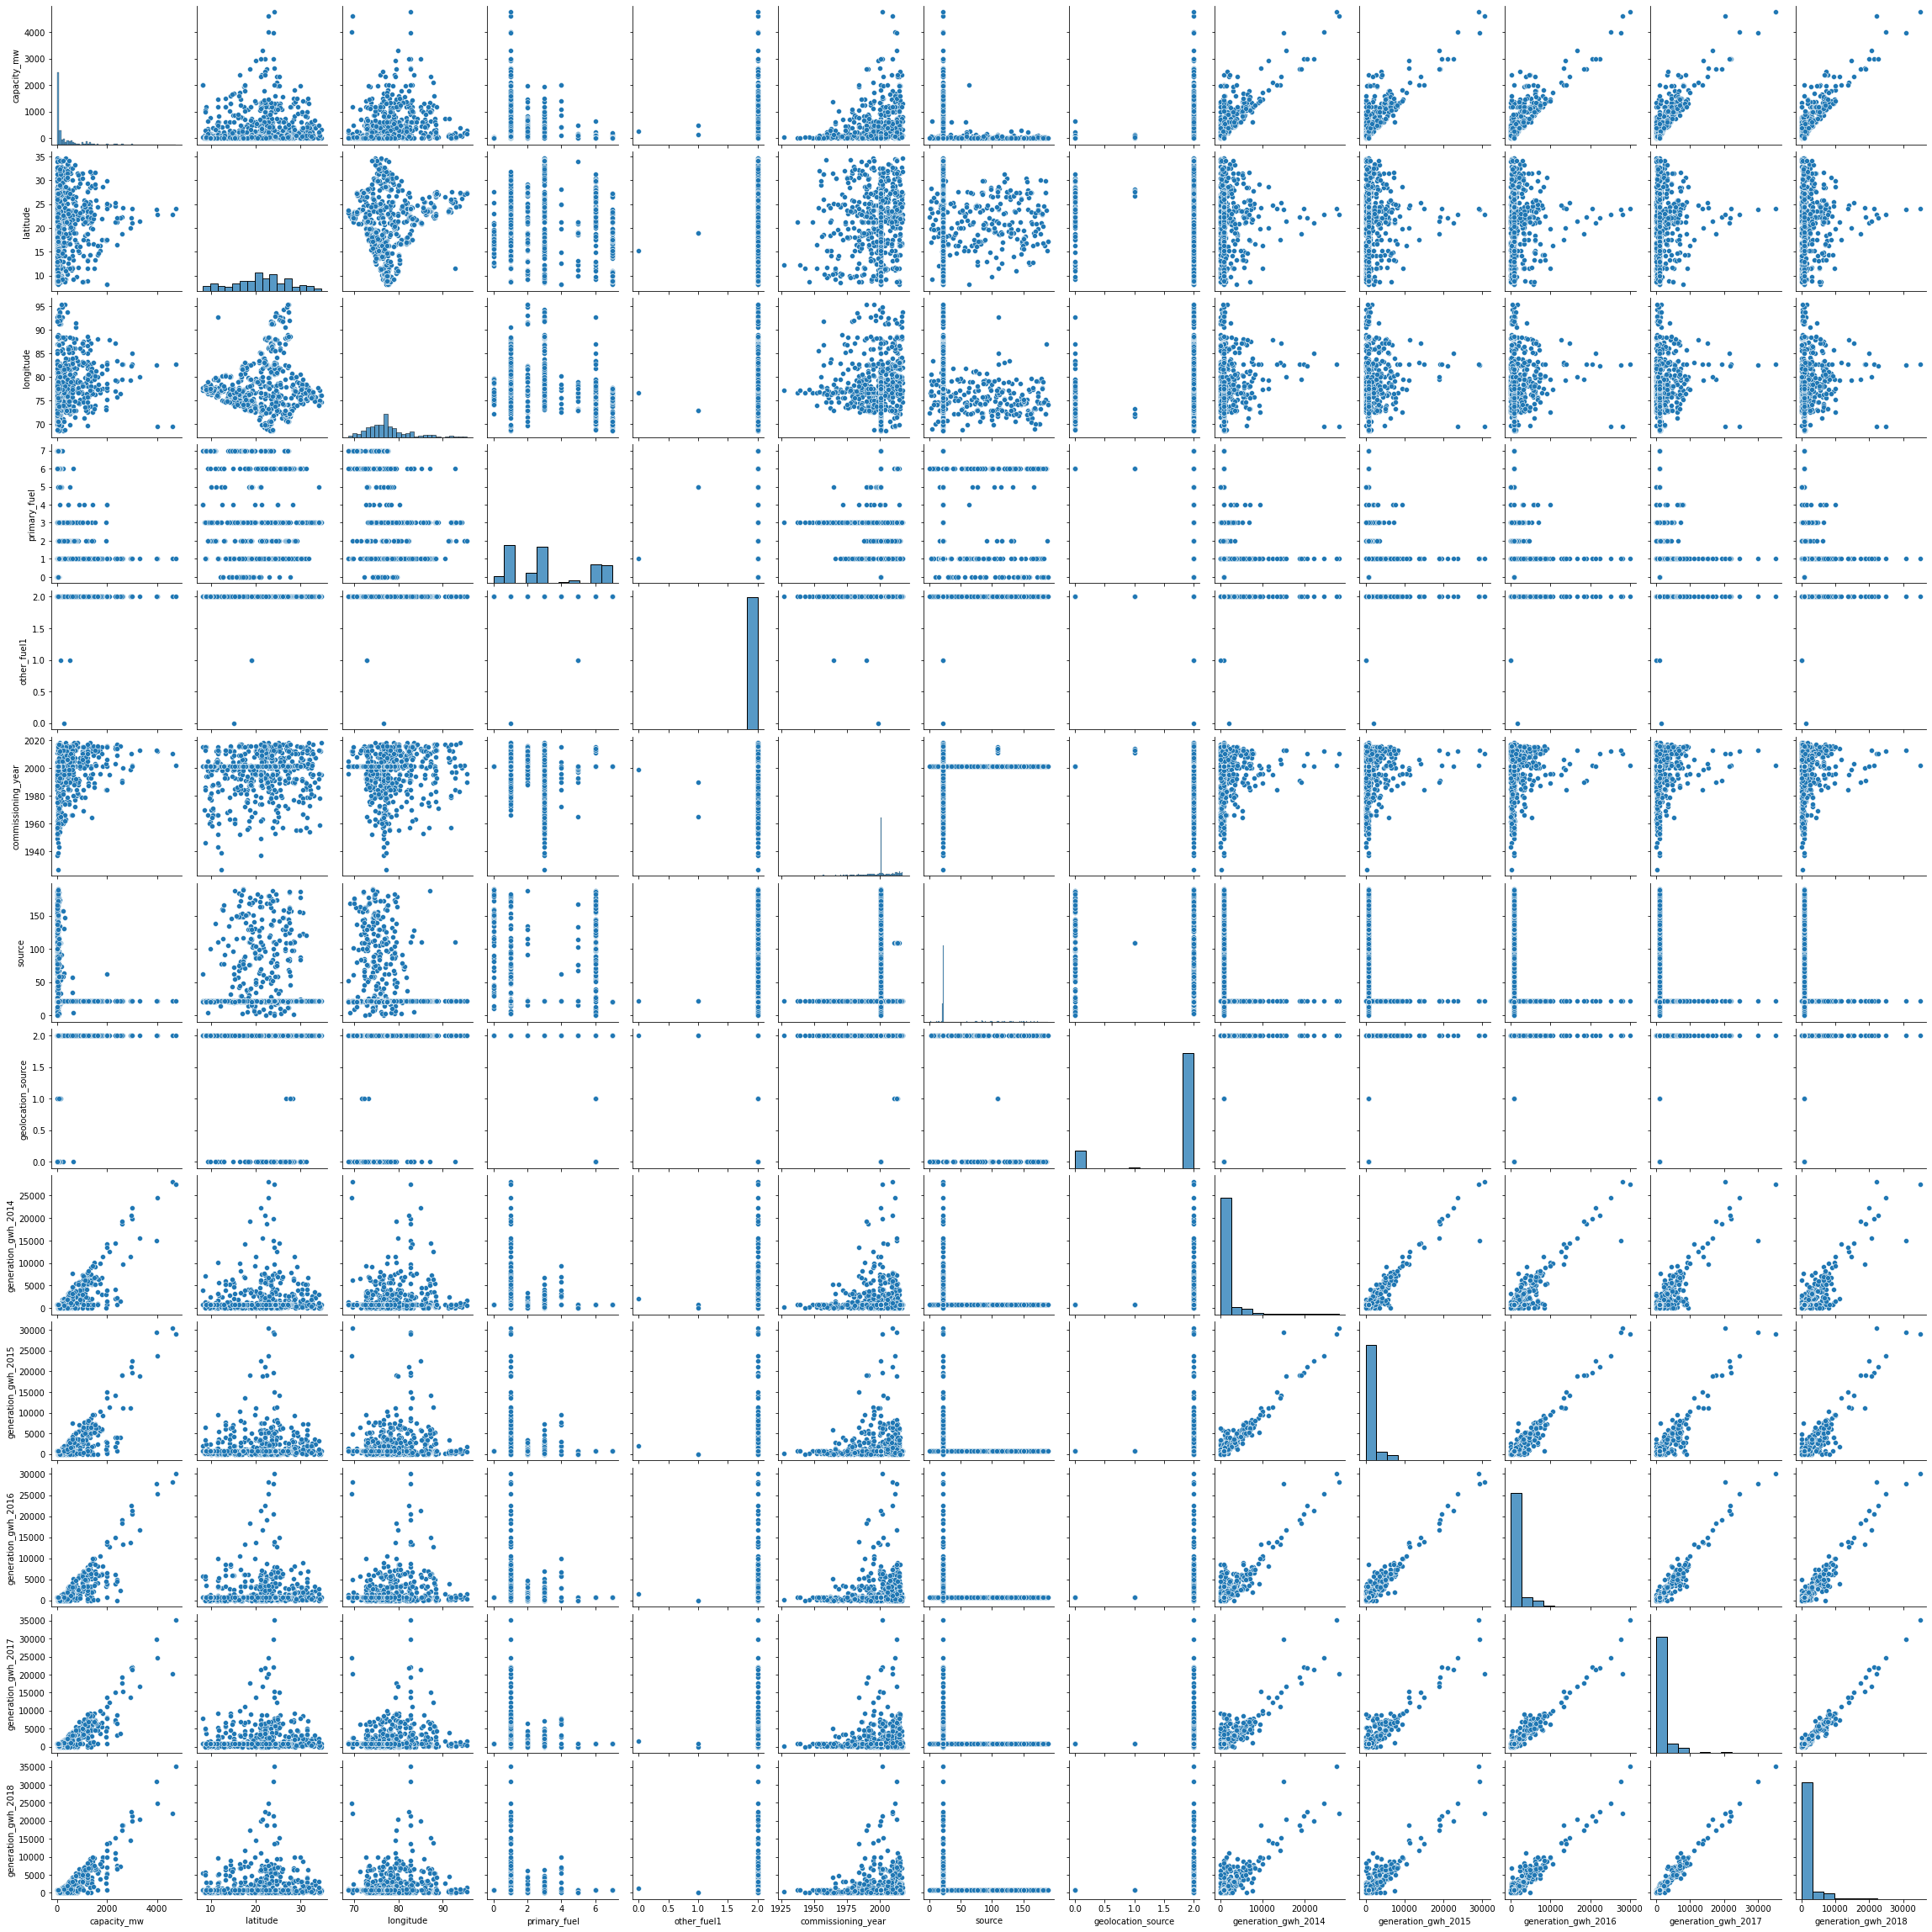

In [72]:
# Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df,palette="rocket")

### This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "capacity_mw". Here we can observe the relation between the features and label.Most of the features have strong linear relationship and correlation with each other.


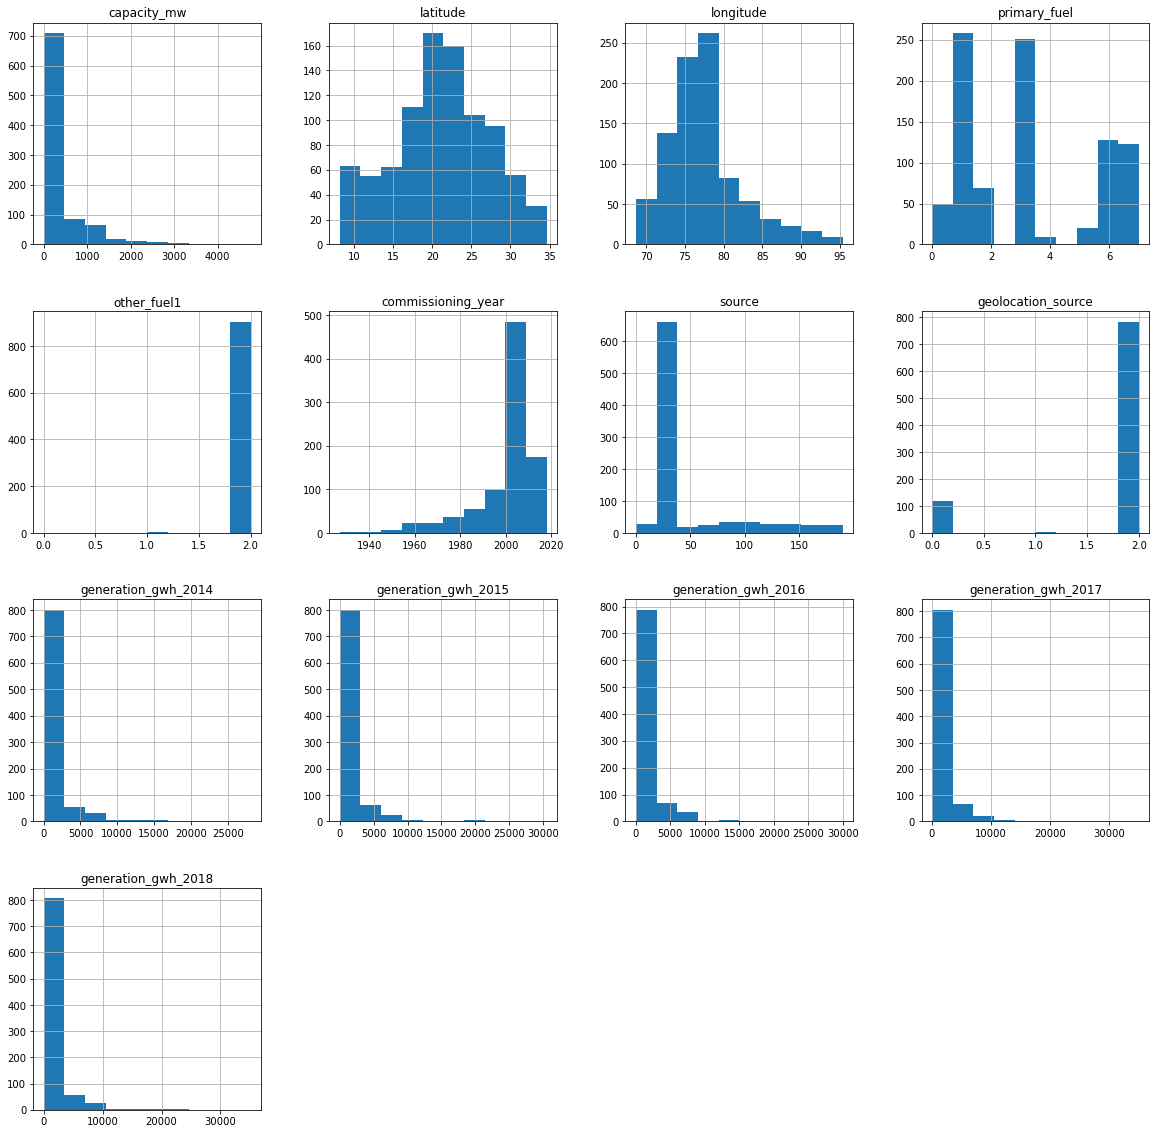

In [73]:
df.hist(bins=10, figsize=(20,20))
plt.show()

### We can notice that lot of Skewness  is present in the dataset(Right and Left both skewness is present) ,So we will reduce all this skewness later. Only latitude seem to have Normal Distribution..

capacity_mw               AxesSubplot(0.125,0.787927;0.227941x0.0920732)
latitude               AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
longitude              AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
primary_fuel              AxesSubplot(0.125,0.677439;0.227941x0.0920732)
other_fuel1            AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
commissioning_year     AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
source                    AxesSubplot(0.125,0.566951;0.227941x0.0920732)
geolocation_source     AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
generation_gwh_2014    AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
generation_gwh_2015       AxesSubplot(0.125,0.456463;0.227941x0.0920732)
generation_gwh_2016    AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
generation_gwh_2017    AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
generation_gwh_2018       AxesSubplot(0.125,0.345976;0.227941x0.0920732)
dtype: object

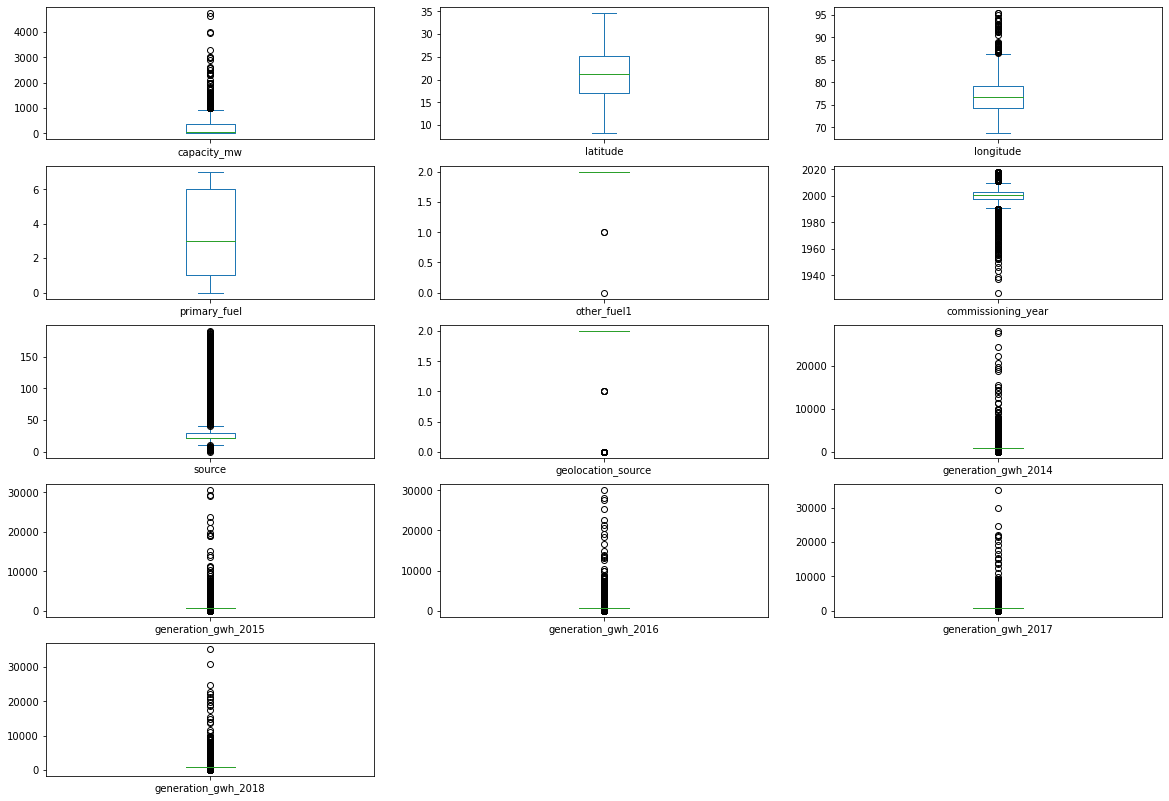

In [74]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

### `capacity_mw,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018'`  have Outliers Present in the dataset .. We will remove it in later steps..

<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> CORRELATION <h2>

In [75]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.199299,-0.380395,0.003105,0.211042,-0.242122,0.204865,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036341,-0.010204,0.036695,0.087937,0.055927,-0.184275,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.199299,0.036341,1.000000,-0.352056,0.029867,0.029583,-0.236623,0.249100,0.106855,0.123763,0.145640,0.154014,0.157405
primary_fuel,-0.380395,-0.010204,-0.352056,1.000000,0.004912,-0.054885,0.053613,-0.483217,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
other_fuel1,0.003105,0.036695,0.029867,0.004912,1.000000,0.043267,0.026590,-0.021408,0.005598,0.008950,0.013919,0.012077,0.018076
commissioning_year,0.211042,0.087937,0.029583,-0.054885,0.043267,1.000000,0.100747,-0.073907,0.076971,0.108752,0.140964,0.153554,0.156927
source,-0.242122,0.055927,-0.236623,0.053613,0.026590,0.100747,1.000000,-0.505720,-0.125854,-0.131123,-0.135018,-0.134934,-0.141216
geolocation_source,0.204865,-0.184275,0.249100,-0.483217,-0.021408,-0.073907,-0.505720,1.000000,0.101329,0.105571,0.108707,0.108639,0.113697
generation_gwh_2014,0.793497,0.058594,0.106855,-0.240656,0.005598,0.076971,-0.125854,0.101329,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.123763,-0.249304,0.008950,0.108752,-0.131123,0.105571,0.963719,1.000000,0.973231,0.940229,0.933161


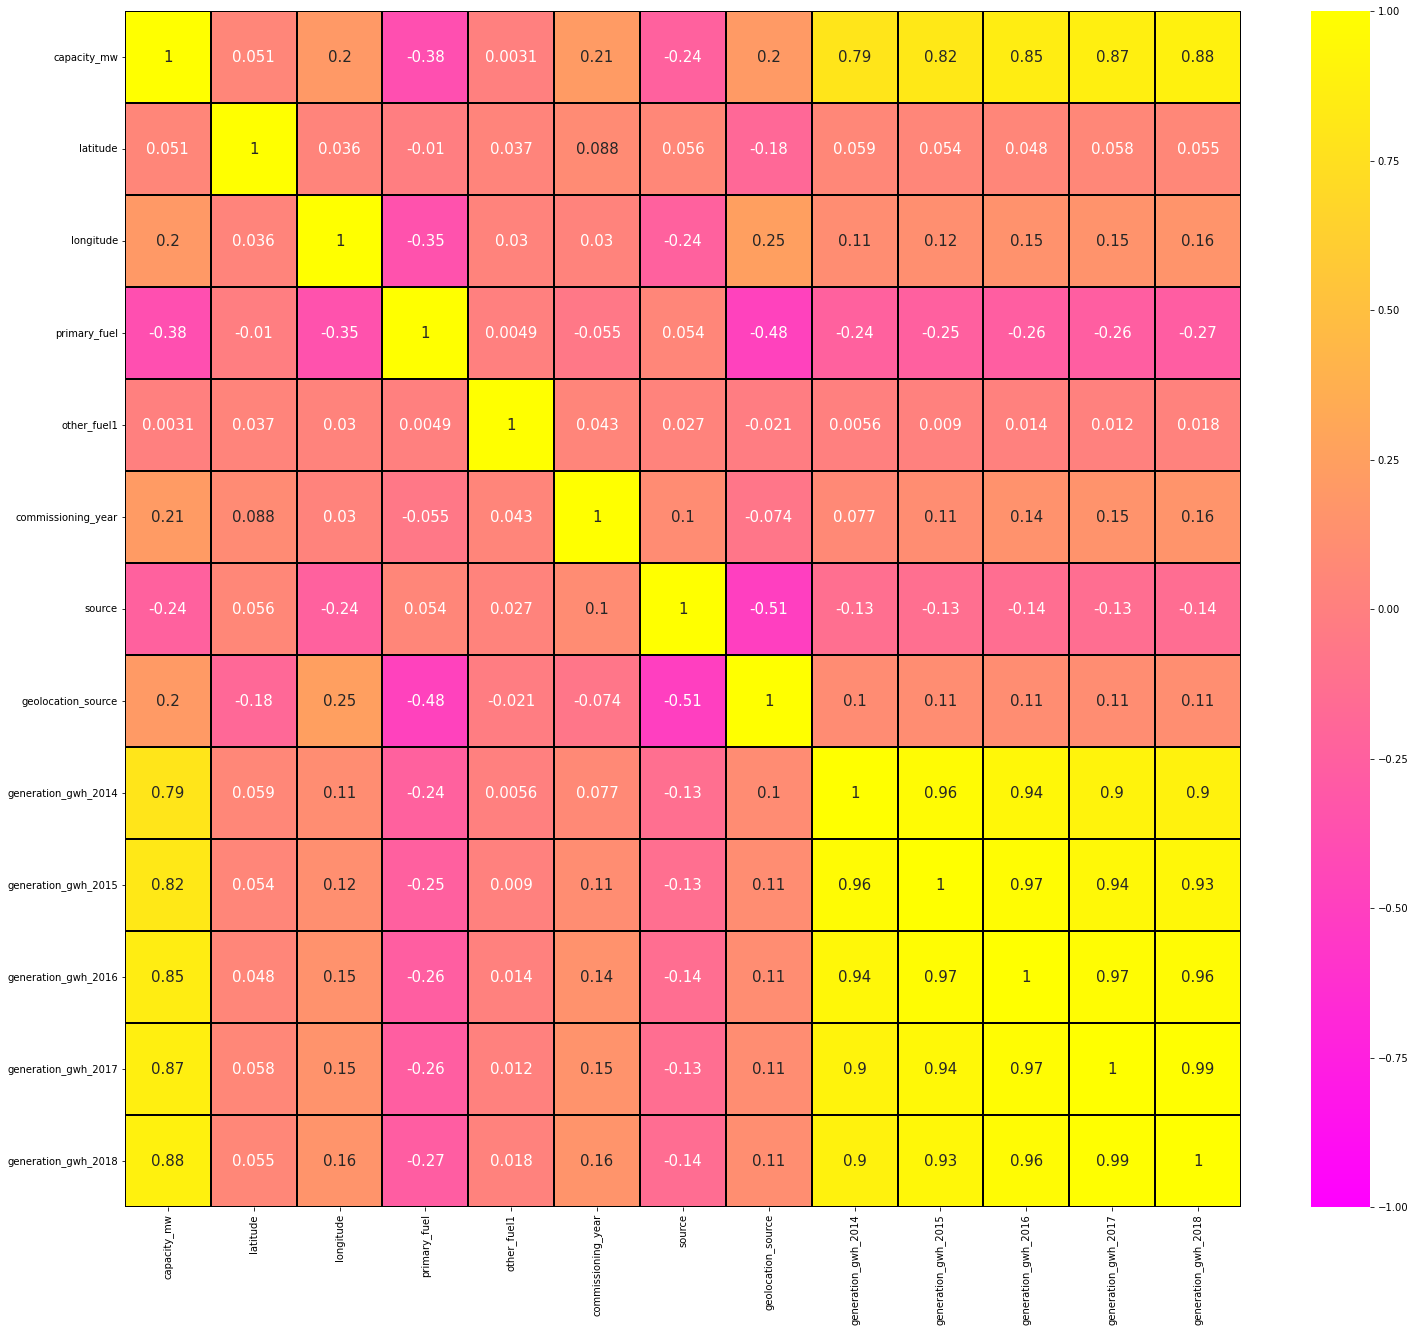

In [76]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="spring")
plt.yticks(rotation=0);

## This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

**`Correlation between capacity_mw and features`**

In [77]:
df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
source                -0.242122
other_fuel1            0.003105
latitude               0.050984
longitude              0.199299
geolocation_source     0.204865
commissioning_year     0.211042
generation_gwh_2014    0.793497
generation_gwh_2015    0.819676
generation_gwh_2016    0.853008
generation_gwh_2017    0.868338
generation_gwh_2018    0.884840
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

### Only 2 of the columns are Negatively correlated ,resting all the columns have postive relation to target variable

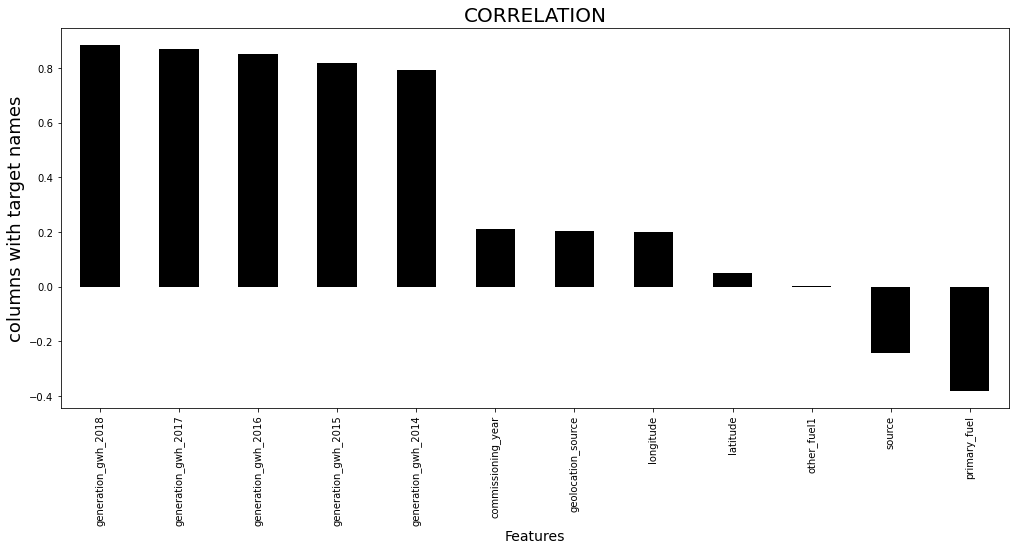

In [78]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

`generation_gwh_2014`
`generation_gwh_2015`    
`generation_gwh_2016`    
`generation_gwh_2017`    
`generation_gwh_2018`

**These are the columns Which are very positively correlated to Taget variable...**

### Here we will not be dropping any columns bcz all columns are important

<h2 style='text-align:center;font-size:40px;background-color:green;border:40px;color:white'> DESCRIPTIVE STATISTICS <h2>

In [79]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,3.206174,1.995590,1998.728776,43.847850,1.733186,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.079148,4.815073,2.280652,0.081259,13.158621,44.642818,0.677151,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,2.000000,1998.000000,22.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.719500,3.000000,2.000000,2001.000000,22.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,29.500000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,190.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


### We can see all columns having count 907. Looks like it doesn't contain missing values.


<AxesSubplot:>

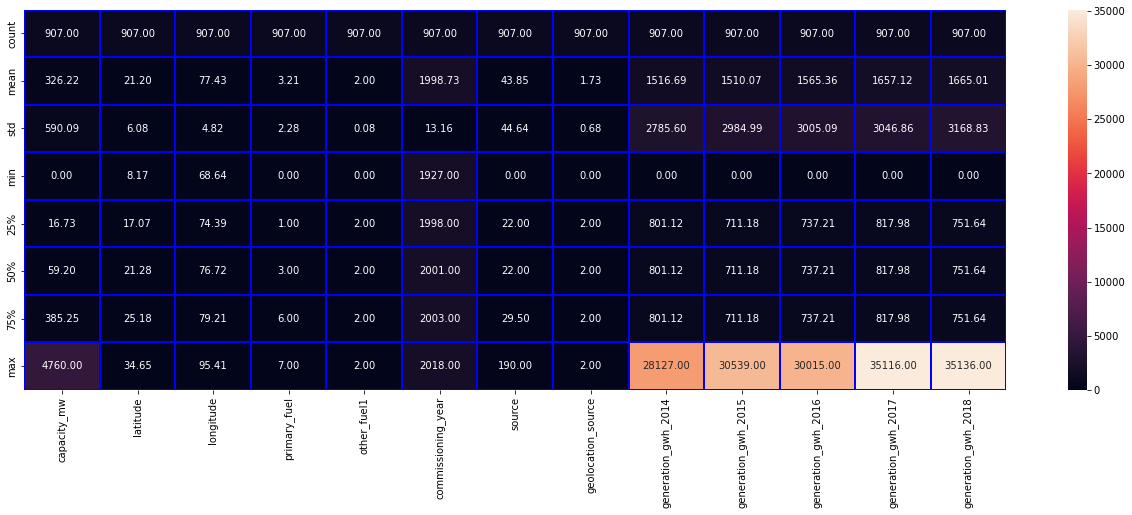

In [80]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f")

## Outcome of describe() of dataset :-
    
**`from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column`**

**Total number rows and column in dataset:-**

**Rows :- `907`**

**columns :- `13`**

<h2 style='text-align:center;font-size:40px;background-color:pink;border:40px;color:white'> Now lets Check Outliers in the dataset <h2>

capacity_mw               AxesSubplot(0.125,0.787927;0.227941x0.0920732)
latitude               AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
longitude              AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
primary_fuel              AxesSubplot(0.125,0.677439;0.227941x0.0920732)
other_fuel1            AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
commissioning_year     AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
source                    AxesSubplot(0.125,0.566951;0.227941x0.0920732)
geolocation_source     AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
generation_gwh_2014    AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
generation_gwh_2015       AxesSubplot(0.125,0.456463;0.227941x0.0920732)
generation_gwh_2016    AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
generation_gwh_2017    AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
generation_gwh_2018       AxesSubplot(0.125,0.345976;0.227941x0.0920732)
dtype: object

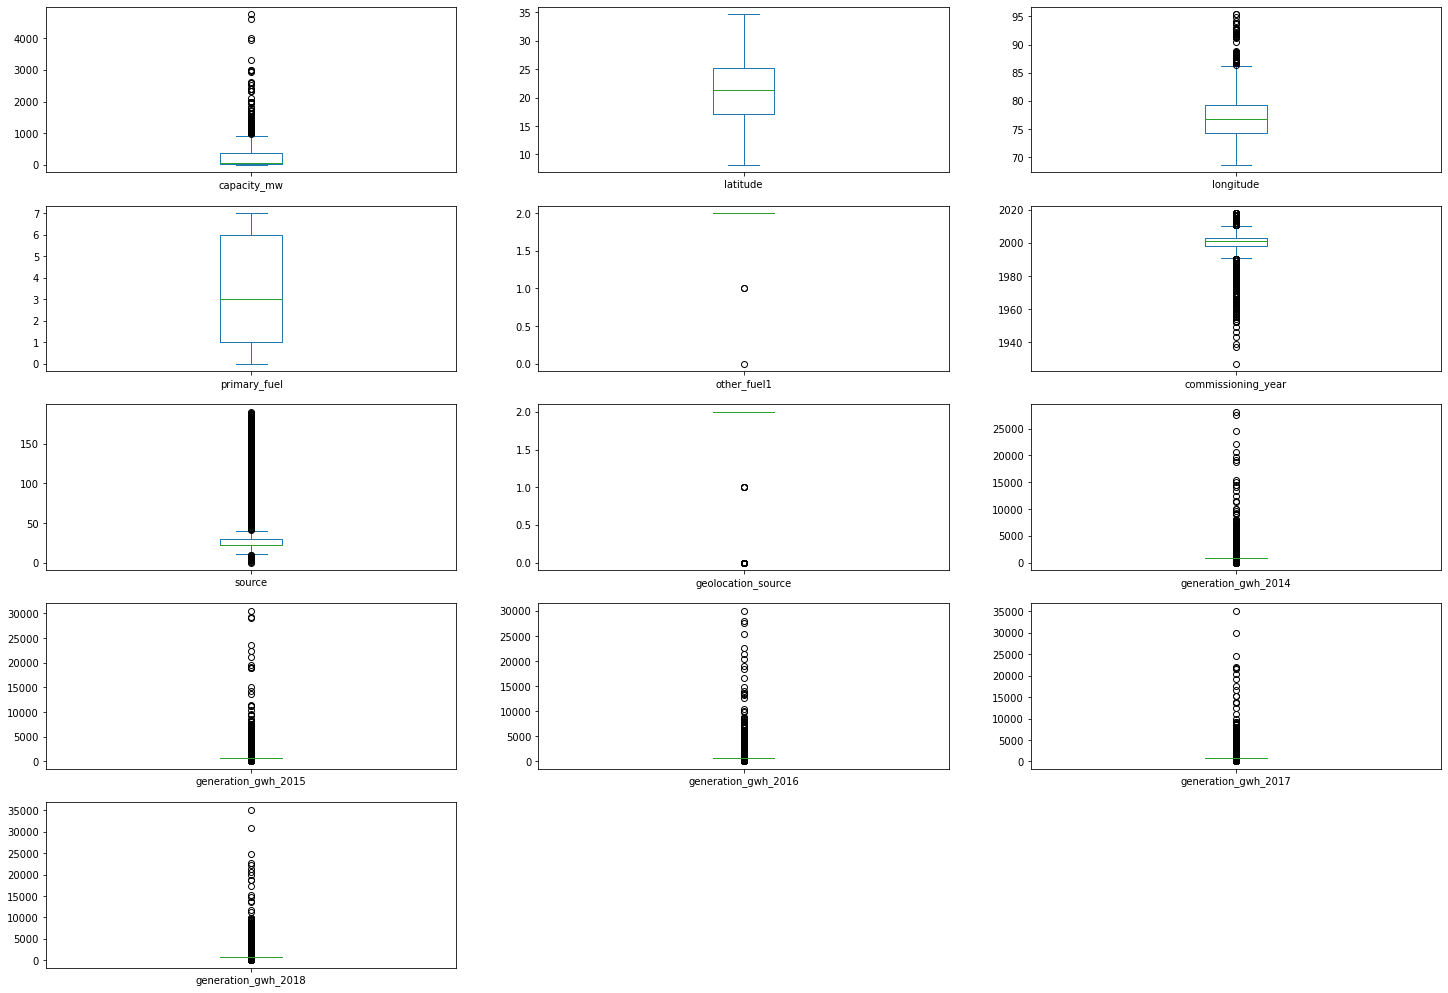

In [81]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(25,25))

### capacity_mw,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018' have Outliers 

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:white'> Lets Check Skewness <h2>


In [82]:
df.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.163320
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.719575
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.321360
generation_gwh_2015     5.566773
generation_gwh_2016     5.281953
generation_gwh_2017     5.315103
generation_gwh_2018     5.133226
dtype: float64

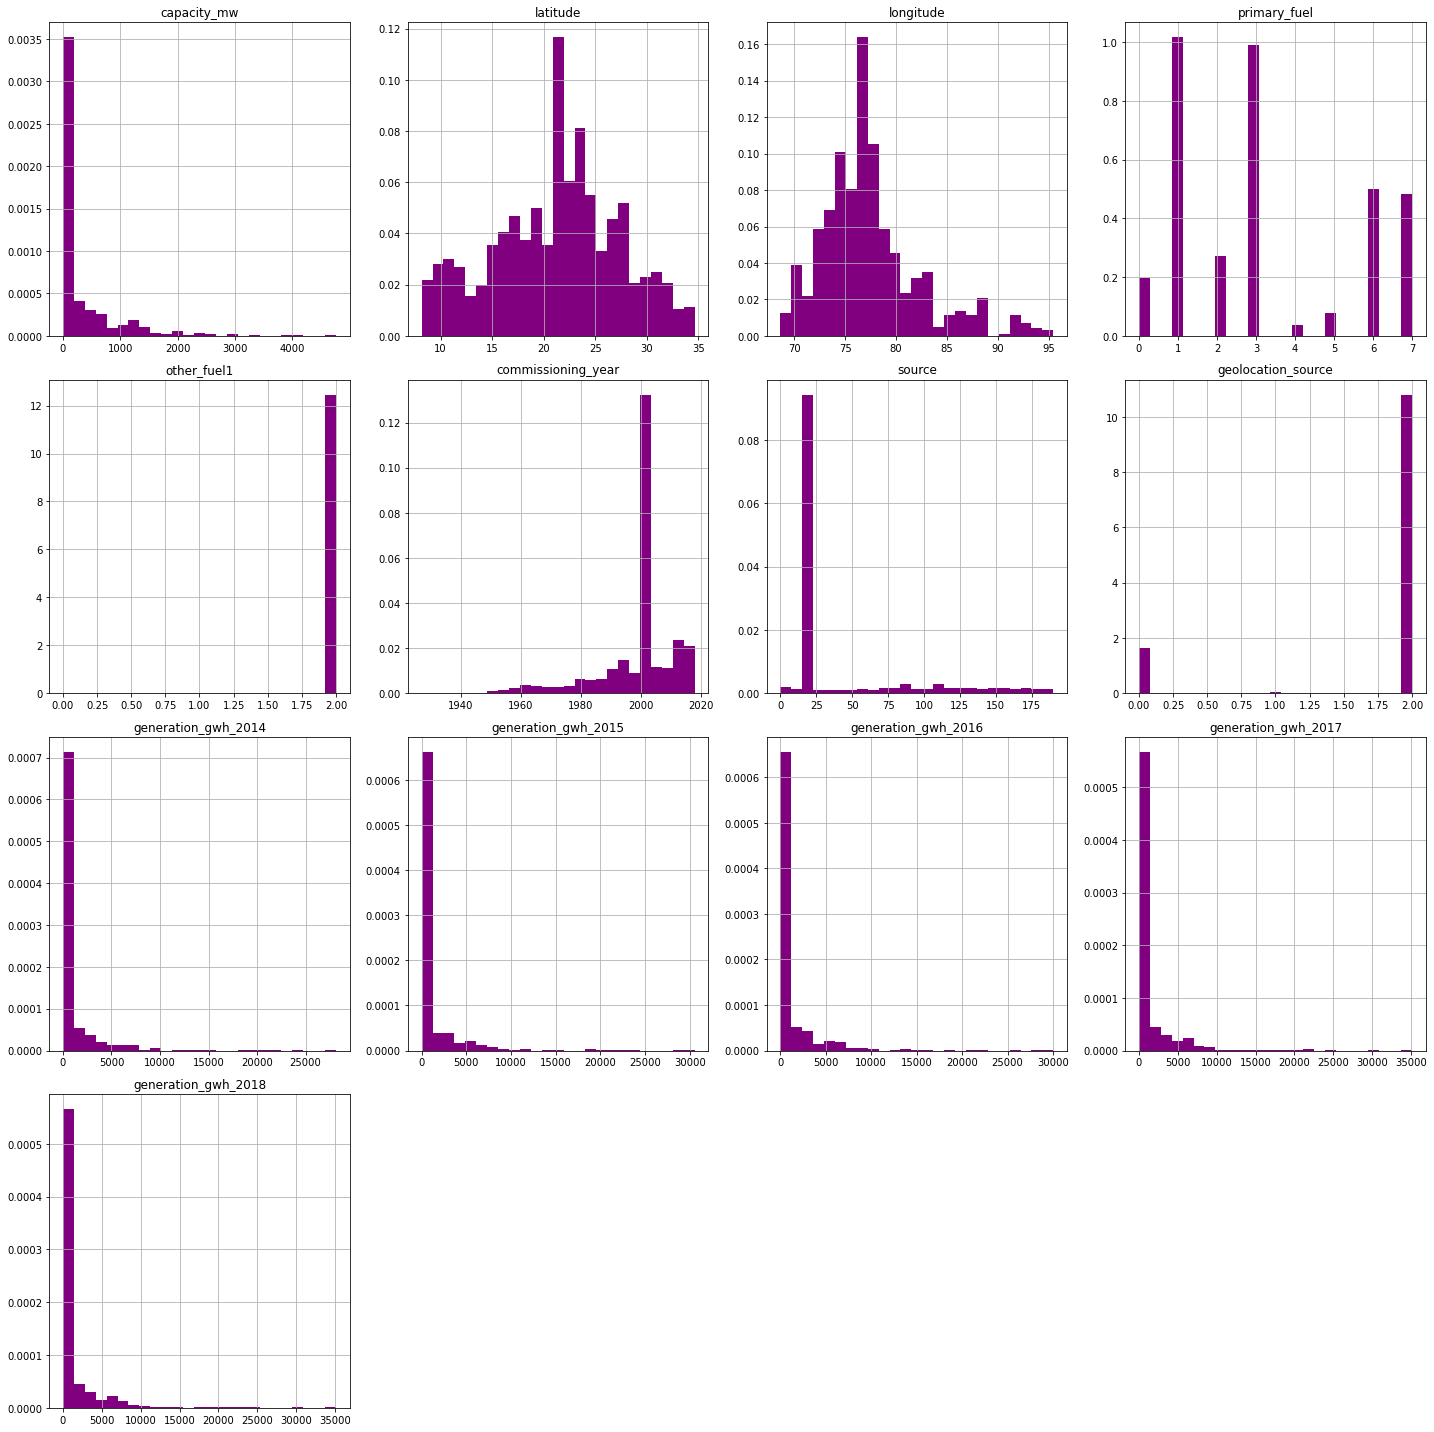

In [83]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='purple',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

## This plot  show Skewness in all the columns ..

<h2 style='text-align:center;font-size:50px;background-color:Black;border:30px;color:green'> Now Lets Remove Outliers Now <h2>

# 1. ZSCORE Method

In [84]:
df.shape

(907, 13)

In [85]:
# Features containing outliers
features = df[['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,capacity_mw,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.869917,0.933076,0.257022,0.267783,0.275737,0.275565,0.288394
1,0.386977,0.585590,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
2,0.486679,1.673567,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
3,0.324240,2.895239,0.400812,0.322873,0.223348,0.226194,0.326203,0.327990
4,2.498942,1.035238,1.237227,0.545554,1.476964,1.557432,1.224379,1.772608
...,...,...,...,...,...,...,...,...
902,2.159821,0.014609,1.313265,0.257022,0.505833,0.443415,0.259992,0.308963
903,0.548060,0.153415,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
904,0.509909,0.383592,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
905,0.417498,0.764564,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394


In [86]:
df_new=df[(z<3).all(axis=1)]

In [87]:
df_new.shape

(846, 13)

In [88]:
# Percentage of data loss

DataLoss=((907-828)/907)*100
DataLoss

8.710033076074973

### 8.710033076074973% is data lossed during Outlier Removal by Zscore method.

# 2. IQR (Inter Quantile Range) method

In [89]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [90]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (907, 13)

New DataFrame data in Rows and Column: (185, 13)

Total Dropped rows: 722


In [91]:
#Percentage Data Loss using IQR
data_loss1 = (907-185)/907*100
data_loss1

79.60308710033075

## 79.60308710033075 % is data lossed during Outlier Removal by IQR method.

## SO HERE WE WILL GO WITH ZSCORE METHOD BECAUSE IT HAS LESS DATALOSS AS COMPARED TO IQR

<h2 style='text-align:center;font-size:40px;background-color:purple;border:30px;color:white'> *Now Lets Remove Skewness Now* <h2>

In [92]:
df.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.163320
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.719575
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.321360
generation_gwh_2015     5.566773
generation_gwh_2016     5.281953
generation_gwh_2017     5.315103
generation_gwh_2018     5.133226
dtype: float64

# capacity_mw,longitude,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 have skewness .... But we will not remove from source,Geolocation_source,primary fuel and other fuel1  as they catagorical columns

In [93]:
L1=['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [94]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [95]:
#Removing skewness using yeo-johnson
df_new[['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']] = PT.fit_transform(df_new[['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].values)

In [96]:
#Checking skewness after removing skewness by power transform
df_new.skew()

capacity_mw             0.015186
latitude               -0.118531
longitude               0.000318
primary_fuel            0.404222
other_fuel1           -19.750675
commissioning_year     -0.323194
source                  1.724898
geolocation_source     -2.056692
generation_gwh_2014     0.234988
generation_gwh_2015     0.168580
generation_gwh_2016     0.154255
generation_gwh_2017     0.131308
generation_gwh_2018     0.137478
dtype: float64

### We can see that  the skewness from all the columns ahve been removed except the catagorical columns

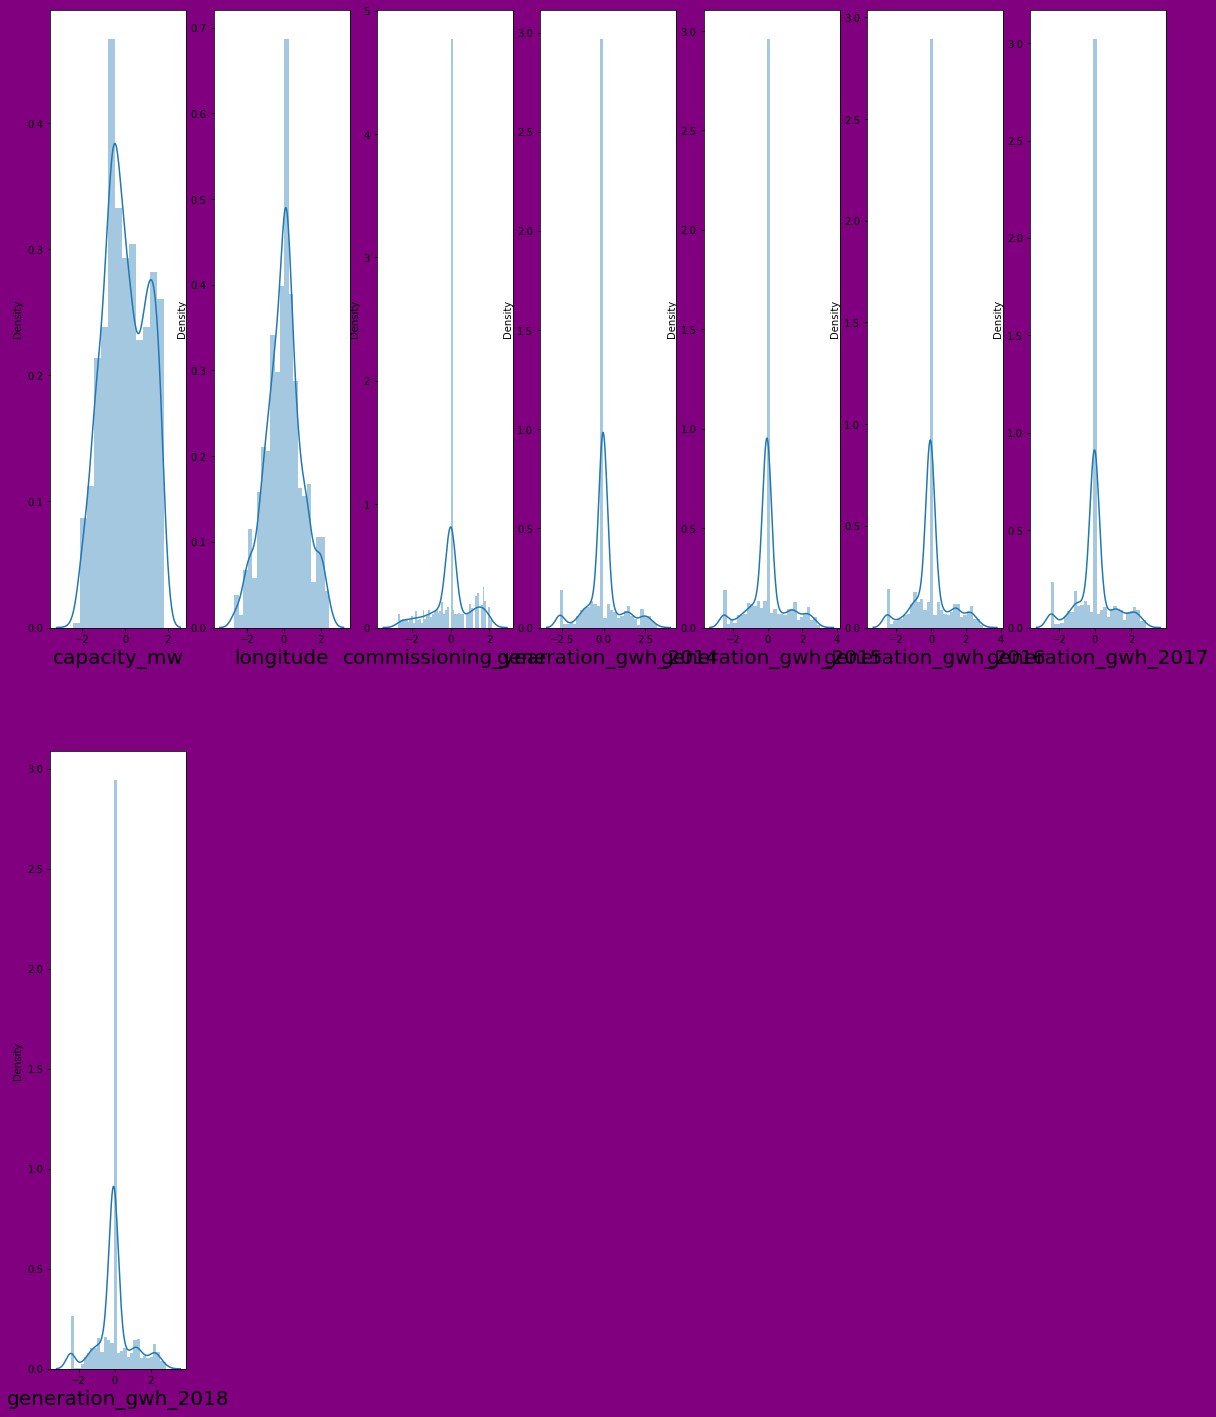

In [97]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='purple')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# now all the columns are Normalized and skewness free

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Split the dataset into dependent and independent variable* <h2>

In [98]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676116,28.1839,-0.918187,6,2,1.156948,109,1,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
1,0.231634,24.7663,-0.496301,1,2,0.002126,174,2,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
2,-0.266730,21.9038,-2.373965,7,2,0.002126,21,2,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
3,0.404484,23.8712,2.426620,2,2,0.321256,22,2,-0.263441,0.101715,0.111906,-0.191976,-0.186610
4,1.759489,21.9603,1.262372,1,2,1.698032,22,2,1.432304,2.302682,2.301691,2.020971,2.412487


In [99]:
x=df_new.loc [:,df_new.columns != 'capacity_mw']

# Independent Variable

In [100]:
y=df_new.loc[:,'capacity_mw']

#Dependent Variable

In [101]:
x.shape

(846, 12)

In [102]:
y.shape

(846,)

<h2 style='text-align:center;font-size:40px;background-color:Black;border:40px;color:white'> *Now Lets Scale The Dataset* <h2>

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.162213,-0.918187,1.169593,0.056232,1.156948,1.391906,-1.031579,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
1,0.601048,-0.496301,-0.981441,0.056232,0.002126,2.812646,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
2,0.131029,-2.373965,1.599800,0.056232,0.002126,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
3,0.454073,2.426620,-0.551234,0.056232,0.321256,-0.509699,0.408546,-0.263441,0.101715,0.111906,-0.191976,-0.186610
4,0.140306,1.262373,-0.981441,0.056232,1.698032,-0.509699,0.408546,1.432304,2.302682,2.301691,2.020971,2.412487
...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.789946,0.234562,-0.981441,0.056232,1.841190,-0.509699,0.408546,-0.038481,-2.461769,-0.842413,0.020775,-0.117460
842,-1.348501,0.423902,1.169593,0.056232,0.002126,0.692465,-2.471705,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
843,-0.957281,-0.221150,1.599800,0.056232,0.002126,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
844,0.532692,-0.756895,-0.981441,0.056232,0.002126,0.299030,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495


<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Whether Multicollinearity is present in the dataset or not ?* <h2>

### WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [107]:
vif_cal()

    VIF FACTOR             FEATURES
0     1.088976             latitude
1     1.317374            longitude
2     1.700611         primary_fuel
3     1.022977          other_fuel1
4     1.108289   commissioning_year
5     1.515352               source
6     1.970461   geolocation_source
7     3.606869  generation_gwh_2014
8     6.261982  generation_gwh_2015
9    10.952793  generation_gwh_2016
10    9.813108  generation_gwh_2017
11    9.290824  generation_gwh_2018


### Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models....

# Lets do PCA - Principal Component Analysis

In [108]:
from sklearn.decomposition import PCA

In [109]:
pca=PCA(n_components=10)

In [110]:
x=pca.fit_transform(x)
x

array([[-0.14506719,  2.33041554, -1.19880369, ..., -0.09250669,
        -0.63579901, -0.02976592],
       [-0.00597249,  0.84716707, -1.29763509, ...,  0.20432902,
        -1.04257659,  0.03310921],
       [-0.38691618,  1.37075511,  1.30954913, ...,  0.20677224,
        -0.38919241, -0.02408276],
       ...,
       [-0.32518338,  0.16011172,  1.16932866, ..., -0.00269513,
        -0.68498597,  0.01432113],
       [ 0.02459998, -0.11047547, -0.39582118, ...,  0.12596858,
         0.21359652, -0.02570929],
       [-0.35481442, -0.23837399,  1.40014155, ..., -0.07605847,
        -0.65949923,  0.01248264]])

## Now Our dataset is Reduced to n_component = 10

# Model Training and testing

In [111]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [112]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.5457785762652898
At random state 0,the testing accuracy is :- 0.4261724342645462



At random state 1,the training accuracy is :- 0.5311264773651905
At random state 1,the testing accuracy is :- 0.42568304066795803



At random state 2,the training accuracy is :- 0.5538550636003223
At random state 2,the testing accuracy is :- 0.31942272499372837



At random state 3,the training accuracy is :- 0.5184307820326668
At random state 3,the testing accuracy is :- 0.5401415281186565



At random state 4,the training accuracy is :- 0.5251035452964581
At random state 4,the testing accuracy is :- 0.5084137888238265



At random state 5,the training accuracy is :- 0.5247269025052296
At random state 5,the testing accuracy is :- 0.5127061425499994



At random state 6,the training accuracy is :- 0.5134289744714484
At random state 6,the testing accuracy is :- 0.556879876567231



At random state 7,the training accuracy is :- 0.5283953740994618
At random 

At random state 80,the training accuracy is :- 0.5224749681535931
At random state 80,the testing accuracy is :- 0.5170761196430909



At random state 81,the training accuracy is :- 0.5259066818213358
At random state 81,the testing accuracy is :- 0.5087519292943398



At random state 82,the training accuracy is :- 0.5052583673346457
At random state 82,the testing accuracy is :- 0.5658769814299036



At random state 83,the training accuracy is :- 0.5340564573712593
At random state 83,the testing accuracy is :- 0.4591149101012997



At random state 84,the training accuracy is :- 0.5225514789876355
At random state 84,the testing accuracy is :- 0.5202733131191632



At random state 85,the training accuracy is :- 0.5250333278407444
At random state 85,the testing accuracy is :- 0.5115343596778749



At random state 86,the training accuracy is :- 0.5062842618232484
At random state 86,the testing accuracy is :- 0.581299558340014



At random state 87,the training accuracy is :- 0.54388682369597

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=89)

In [114]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [115]:
# predict the  data with x_test

pred_test=lr.predict(x_test)

In [116]:
print (r2_score(y_test,pred_test))

0.5071870143899934


# CROSS VALIDATION OF THE LINEAR REGRESSION MODEL

In [117]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_lr)

In [118]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- -2177.322531643121
Accuracy_score is :- 50.71870143899934


At cv:- 5
Cross validation score is :- -89.45623888609772
Accuracy_score is :- 50.71870143899934


At cv:- 6
Cross validation score is :- -256.58549381972074
Accuracy_score is :- 50.71870143899934


At cv:- 7
Cross validation score is :- -295.6544413605754
Accuracy_score is :- 50.71870143899934


At cv:- 8
Cross validation score is :- -372.43360303095596
Accuracy_score is :- 50.71870143899934


At cv:- 9
Cross validation score is :- -246.90385834465954
Accuracy_score is :- 50.71870143899934




In [119]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  -0.8945623888609772 
The accuracy_score is: 0.5071870143899934


In [120]:
from sklearn import metrics

In [121]:

MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)

In [122]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 0.5768632971084361
mean squared error: 0.4943373580611488


In [123]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.7030912871463768


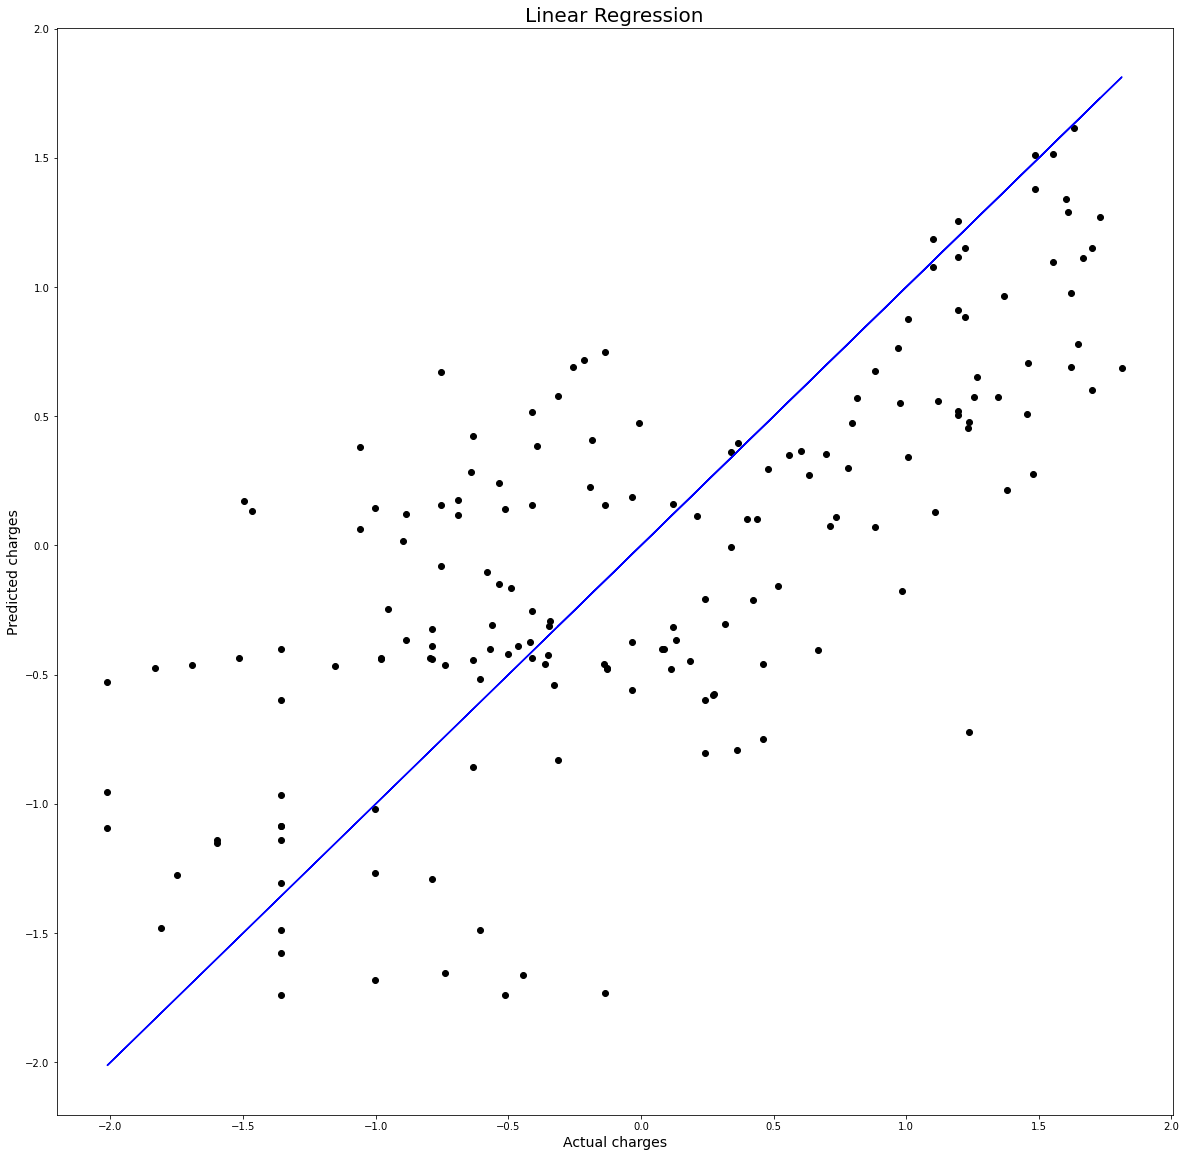

In [124]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

## We can see that the data's are scattered and are far away from the best fit line

## --------------------------------------------------------------------------------------------------------------

# `Decision Tree Regressor`

In [125]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [126]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.9929325607363619
At random state 0,the testing accuracy is :- 0.5420011895722829



At random state 1,the training accuracy is :- 0.9929445160471629
At random state 1,the testing accuracy is :- 0.5498955407929245



At random state 2,the training accuracy is :- 0.9912465579087357
At random state 2,the testing accuracy is :- 0.6766619790786604



At random state 3,the training accuracy is :- 0.9929142028356447
At random state 3,the testing accuracy is :- 0.5607226387134097



At random state 4,the training accuracy is :- 0.9929709271967174
At random state 4,the testing accuracy is :- 0.609175102162903



At random state 5,the training accuracy is :- 0.9920734282028847
At random state 5,the testing accuracy is :- 0.6377811621106351



At random state 6,the training accuracy is :- 0.9917300519448977
At random state 6,the testing accuracy is :- 0.5945962851831074



At random state 7,the training accuracy is :- 0.9934061684109856
At random st

At random state 68,the training accuracy is :- 0.9933007632287457
At random state 68,the testing accuracy is :- 0.6909948489485656



At random state 69,the training accuracy is :- 0.9911815947607813
At random state 69,the testing accuracy is :- 0.577923389948778



At random state 70,the training accuracy is :- 0.9926886171627924
At random state 70,the testing accuracy is :- 0.5290812270334609



At random state 71,the training accuracy is :- 0.9918179124437737
At random state 71,the testing accuracy is :- 0.6007312853062774



At random state 72,the training accuracy is :- 0.9941021867925728
At random state 72,the testing accuracy is :- 0.5674931958523389



At random state 73,the training accuracy is :- 0.9946256298970196
At random state 73,the testing accuracy is :- 0.632512485464197



At random state 74,the training accuracy is :- 0.9949932494622751
At random state 74,the testing accuracy is :- 0.6398549784478367



At random state 75,the training accuracy is :- 0.993459960694428

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

In [128]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [129]:
pred_test=dt.predict(x_test)

In [130]:
print (r2_score(y_test,pred_test))

0.6775102975306319


## CV of DecisionTreeRegressor

In [131]:
pred_dt=dt.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_dt)

In [132]:
for i in range(4,10):
    lsscore=cross_val_score(dt,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 57.954150691157636
Accuracy_score is :- 67.75102975306318


At cv:- 5
Cross validation score is :- 54.69533159724397
Accuracy_score is :- 67.75102975306318


At cv:- 6
Cross validation score is :- 53.44589802280887
Accuracy_score is :- 67.75102975306318


At cv:- 7
Cross validation score is :- 55.48145930221607
Accuracy_score is :- 67.75102975306318


At cv:- 8
Cross validation score is :- 59.29082019443289
Accuracy_score is :- 67.75102975306318


At cv:- 9
Cross validation score is :- 54.20014475656267
Accuracy_score is :- 67.75102975306318




In [133]:
# I will take CV as 8 bcz its close to accuracy score
lsscore_selected= cross_val_score(dt,x,y,cv=8).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.5869405031092201 
The accuracy_score is: 0.6775102975306319


In [134]:

MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)

In [135]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 0.4140561397385848
mean squared error: 0.3247952152953149


In [136]:
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.5699080761801107


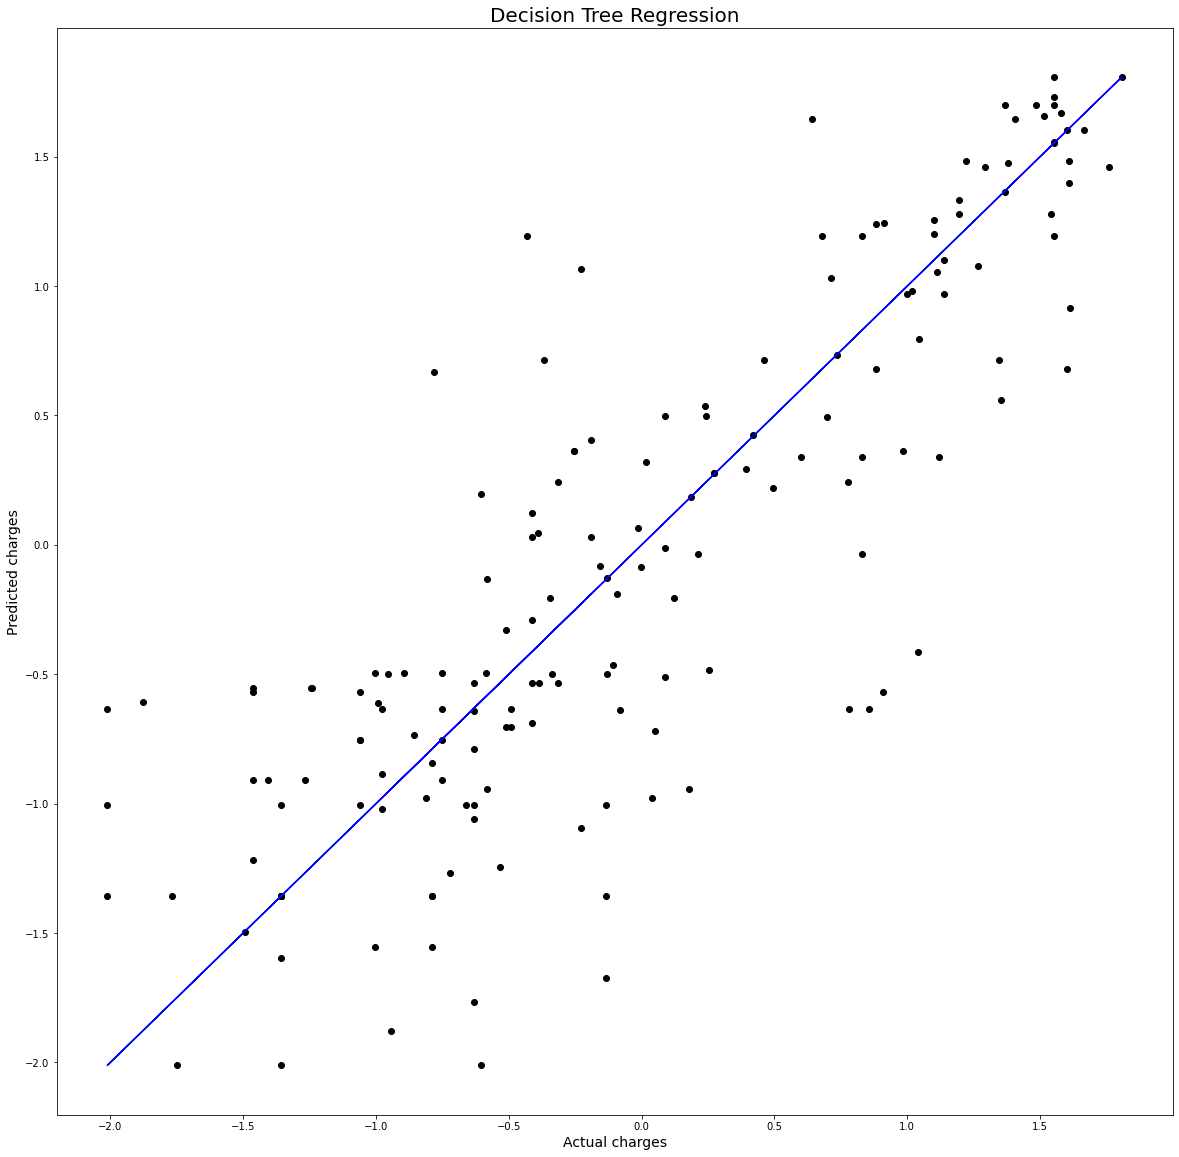

In [137]:
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Decision Tree Regression' , fontsize=20)
plt. show()

### We can see that DTR is performing better than Linear Regression as more of the Data's  falls on the best fit line

## -------------------------------------------------------------------------------------------------------------

# `KNeighborsRegressor`

In [138]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [139]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.8179933324677053
At random state 0,the testing accuracy is :- 0.6555375172236768



At random state 1,the training accuracy is :- 0.8131590151084501
At random state 1,the testing accuracy is :- 0.6592874148916145



At random state 2,the training accuracy is :- 0.807460631402448
At random state 2,the testing accuracy is :- 0.6027882755309679



At random state 3,the training accuracy is :- 0.8091221180587317
At random state 3,the testing accuracy is :- 0.7001177244036444



At random state 4,the training accuracy is :- 0.8018339400974579
At random state 4,the testing accuracy is :- 0.6969120811955165



At random state 5,the training accuracy is :- 0.8023555111751257
At random state 5,the testing accuracy is :- 0.6578156292170343



At random state 6,the training accuracy is :- 0.800658699020963
At random state 6,the testing accuracy is :- 0.731002143430107



At random state 7,the training accuracy is :- 0.8035627018658893
At random stat

At random state 78,the training accuracy is :- 0.8063036687950121
At random state 78,the testing accuracy is :- 0.6940608043109646



At random state 79,the training accuracy is :- 0.8165277927339623
At random state 79,the testing accuracy is :- 0.6308301628739942



At random state 80,the training accuracy is :- 0.8010463165012083
At random state 80,the testing accuracy is :- 0.7257128676267874



At random state 81,the training accuracy is :- 0.7979274512779834
At random state 81,the testing accuracy is :- 0.7119900651184581



At random state 82,the training accuracy is :- 0.7990890502673756
At random state 82,the testing accuracy is :- 0.7157746607381459



At random state 83,the training accuracy is :- 0.8050521547118721
At random state 83,the testing accuracy is :- 0.7014983982728384



At random state 84,the training accuracy is :- 0.8038723999120241
At random state 84,the testing accuracy is :- 0.6869404459386366



At random state 85,the training accuracy is :- 0.8023995204322

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

## I have taken 24 as a random state because the difference between Training and Testing is less

In [141]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [142]:
pred_test=knn.predict(x_test)


In [143]:
print (r2_score(y_test,pred_test))

0.6745858493357583


# CV of KNeighborsRegressor

In [144]:
pred_kn=knn.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_kn)

In [145]:
for i in range(2,10):
    lsscore=cross_val_score(knn,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 2
Cross validation score is :- 64.74898049502215
Accuracy_score is :- 67.45858493357582


At cv:- 3
Cross validation score is :- 66.15231308525269
Accuracy_score is :- 67.45858493357582


At cv:- 4
Cross validation score is :- 67.00035041487222
Accuracy_score is :- 67.45858493357582


At cv:- 5
Cross validation score is :- 67.9105011139415
Accuracy_score is :- 67.45858493357582


At cv:- 6
Cross validation score is :- 66.73661811522756
Accuracy_score is :- 67.45858493357582


At cv:- 7
Cross validation score is :- 67.23676479056326
Accuracy_score is :- 67.45858493357582


At cv:- 8
Cross validation score is :- 68.84500851194592
Accuracy_score is :- 67.45858493357582


At cv:- 9
Cross validation score is :- 68.34598692658231
Accuracy_score is :- 67.45858493357582




In [146]:
# I will take CV as 8 bcz its close to accuracy score
lsscore_selected= cross_val_score(knn,x,y,cv=8).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.6884500851194593 
The accuracy_score is: 0.6745858493357583


In [147]:
MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)

In [148]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 0.3851851556245997
mean squared error: 0.29479998242505706


In [149]:
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.5429548622353952


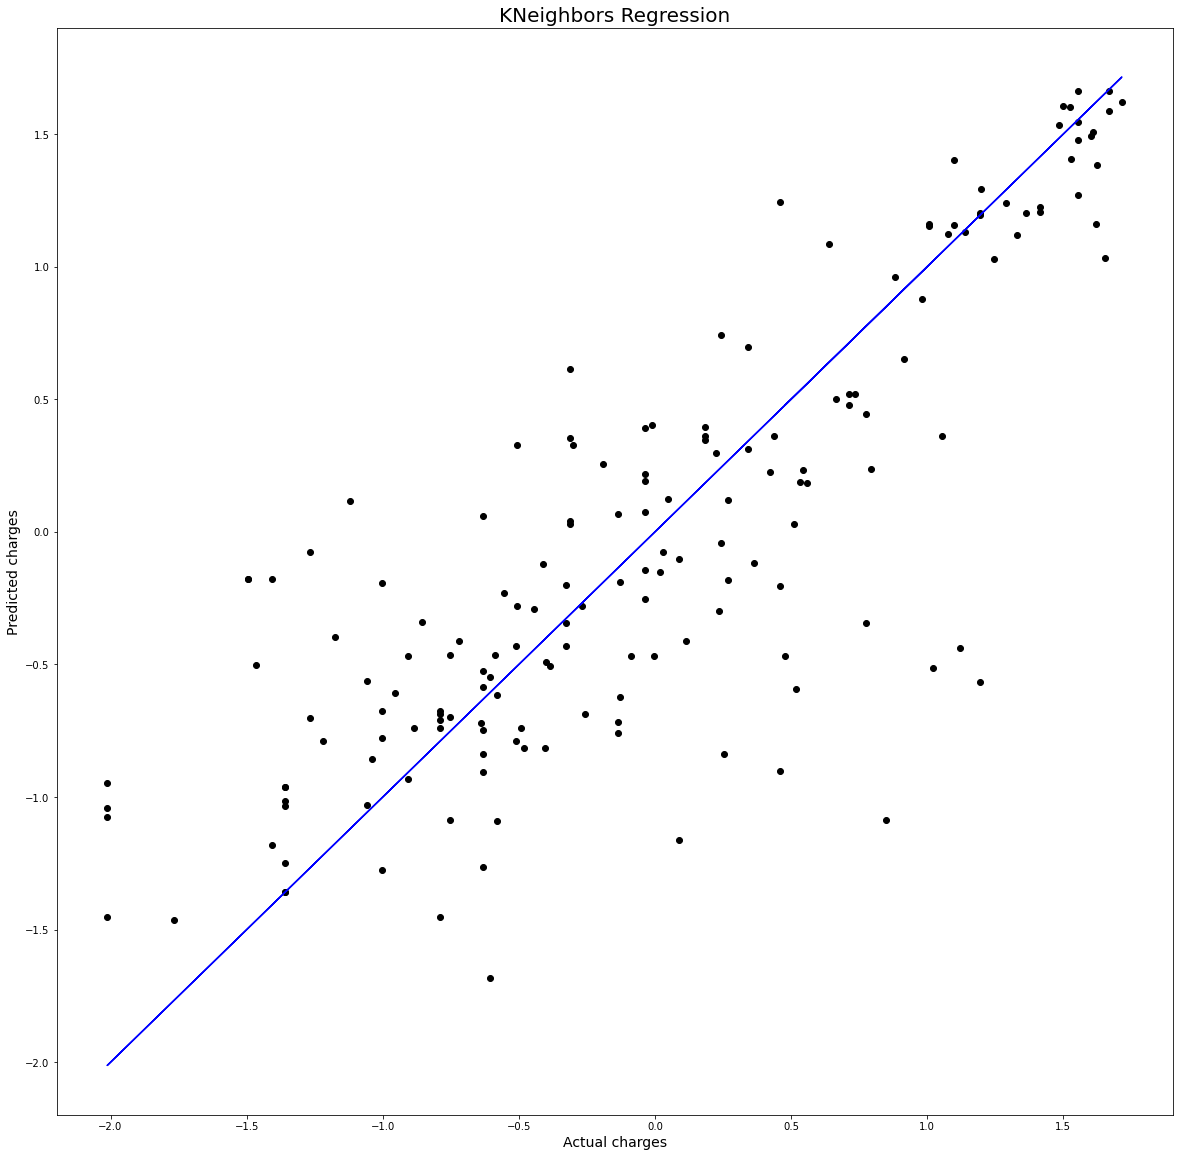

In [150]:
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('KNeighbors Regression' , fontsize=20)
plt. show()

## It's quite similar to decision tree regressor but it's performing 1% much better ..

# ` Ensemble Technique`

## Random Foreset Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [152]:
# Checking R2 score for Random Forest Regressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

predRF=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,predRF))
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print('cv :-' ,cross_val_score(RF,x,y,cv=5).mean())

R2_Score: 0.755795155682061
MAE: 0.33634037787226134
MSE: 0.2212306492083752
RMSE: 0.4703516229464667
cv :- 0.7372838316272412


In [153]:
# Checking R2 score for GradientBoosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))
print('cv :-' ,cross_val_score(gb,x,y,cv=5).mean())

R2_Score: 0.729771648814773
MAE: 0.36625786306204633
MSE: 0.24480592813049698
RMSE: 0.4947786657996654
cv :- 0.7276607028282326


In [154]:
# Checking R2_score  for AdaBoostClassifier
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)

# prediction
predad=ad.predict(x_test)
print('R2_Score:',r2_score(y_test,predad))
print('MAE:',metrics.mean_absolute_error(y_test, predad))
print('MSE:',metrics.mean_squared_error(y_test, predad))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predad)))
print('cv :-' ,cross_val_score(ad,x,y,cv=5).mean())

R2_Score: 0.6261593602951167
MAE: 0.46659516871840495
MSE: 0.33867062569286716
RMSE: 0.5819541439777426
cv :- 0.6687089563558143


# -----------------------------------------------------------------------------------------------

# Reguralization Technique

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [156]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls= Lasso()
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [157]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

52.68991661033383

In [158]:
pred_ls=ls.predict(x_test)

In [159]:
lss=r2_score(y_test,pred_ls)
lss*100

50.531960608285985

In [160]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

50.44703174618761

In [161]:
from sklearn.linear_model import Ridge

parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
xx=GridSearchCV(rd,parameters)
xx.fit(x_train,y_train)
print(xx.best_params_)

{'alpha': 10, 'solver': 'lsqr'}


In [162]:
rd=Ridge(alpha=10,solver='sparse_cg')
rd.fit(x_train,y_train)
rd_score_training = rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
rd_score_training*100

52.86428601647473

In [163]:
pred_rd=rd.predict(x_test)

In [164]:
rdd=r2_score(y_test,pred_rd)
rdd*100

50.100003375551935

In [165]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

50.47768025591884

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets consider model which Model should we go for as a final model* <h2>

In [166]:
mm=pd.DataFrame([["LR","74%"],["DT","75%"],["KNN","64%"],["RF","80%"],["GB","75%"],["ADA","70%"],["LS","54%"],["RD","54%"]],
                    columns=["Model_Name","R2_SCORE"])

mm

,Model_Name,R2_SCORE
0,LR,74%
1,DT,75%
2,KNN,76%
3,RF,80%
4,GB,75%
5,ADA,70%
6,LS,54%
7,RD,54%


### Here we can see that random forest is performing the best So we will do Hyper parameter tuning on This on

# Hyper Parameter Tuning

In [167]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [168]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6,7,8,10,12,14,16,18]}

In [169]:
gg=GridSearchCV(RandomForestRegressor(),parameters,cv=5)


In [170]:
gg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 6, 7, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [171]:
gg.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 200}

In [172]:
rff = RandomForestRegressor(criterion='mae', max_depth=16, max_features='sqrt', n_estimators=200)
rff.fit(x_train, y_train)
pred = rff.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.4703516229464667
R2_Score: 75.24731421328555


## Our model is performing 75% which is good ,Now we will save our final model

# SAVE THE MODEL

In [173]:
#Saving the model using .pkl
import joblib
joblib.dump(rff,"GPP_R.pkl")

['GPP_R.pkl']

### Predicition

In [174]:
#Loading the saved model
aa=joblib.load("GPP_R.pkl")


In [175]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([-0.12914324,  0.35196242, -1.12529443,  1.14436141, -0.1567852 ,
        1.26117927, -1.0512174 , -0.18024251,  1.15388917, -0.12696449,
        0.22293422,  0.76707653, -0.86512942, -0.98487473, -0.3695591 ,
       -0.55881001, -0.29177524, -0.87115053, -0.64661606,  0.10162422,
       -0.27565446,  1.5113372 , -0.37150496,  1.34390847, -0.4586123 ,
       -1.35170027,  0.1723069 , -1.16883085,  1.27555385, -0.11297631,
       -0.57695304,  0.13645748,  1.07397098,  0.06944319,  1.00714495,
        0.86150932, -0.04012736, -0.58033125,  0.06992375, -0.28449189,
        0.45345587, -0.5803195 , -0.53157567,  0.23141205,  0.10741358,
        0.25993282, -0.91632564,  0.13907622,  1.03679255, -1.35346691,
        0.46338054, -0.50284923,  1.03226001, -0.22553125,  1.45326796,
        1.19099765, -1.26943484, -0.94570142, -0.21609228,  1.27653489,
       -1.19532538, -0.19338632,  0.01270099, -0.1206184 ,  0.39342838,
        0.40434448, -0.06327378, -0.42890128, -0.49664672, -0.84

In [176]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
Predicted,-0.129143,0.351962,-1.125294,1.144361,-0.156785,1.261179,-1.051217,-0.180243,1.153889,-0.126964,0.222934,0.767077,-0.865129,-0.984875,-0.369559,-0.558810,-0.291775,-0.871151,-0.646616,0.101624,-0.275654,1.511337,-0.371505,1.343908,-0.458612,-1.35170,0.172307,-1.168831,1.275554,-0.112976,-0.576953,0.136457,1.073971,0.069443,1.007145,0.861509,-0.040127,-0.580331,0.069924,-0.284492,0.453456,-0.580319,-0.531576,0.231412,0.107414,0.259933,-0.916326,0.139076,1.036793,-1.353467,0.463381,-0.502849,1.032260,-0.225531,1.453268,1.190998,-1.269435,-0.945701,-0.216092,1.276535,-1.195325,-0.193386,0.012701,-0.120618,0.393428,0.404344,-0.063274,-0.428901,-0.496647,-0.844993,1.083130,0.110615,-0.488671,-0.036456,-1.078971,1.094375,-0.169319,-0.218345,-0.184016,1.406271,0.520740,-0.306541,-0.061670,-0.562364,0.305103,-1.388442,0.373559,-0.659992,1.165519,0.833945,0.272925,0.711138,0.584214,-0.738315,0.799886,0.528299,1.371999,-1.277903,-0.437623,-0.347981,-0.518206,-0.721591,-0.827683,0.016168,1.364581,-0.726630,1.284927,1.430849,-0.077507,-0.336861,0.198959,1.168758,0.683056,-0.562714,0.697885,1.421296,-0.530272,-0.380887,-0.551869,-0.534401,-0.881277,-0.565500,-0.331501,0.350494,-0.554999,0.139076,-0.559839,-0.008908,-0.601124,1.541192,-0.719758,-0.561225,1.557025,-0.744086,-0.460136,1.172699,-0.588515,0.109018,-0.268243,1.481397,-0.637635,-1.237701,-0.465259,-0.346133,0.298725,1.282596,-0.089567,0.146107,-1.196524,-0.350546,-0.806591,-0.492931,1.192363,-0.404849,-1.640587,1.013547,-0.312264,-1.513282,0.222055,1.505669,1.141275,-1.038413,-0.120286,1.457917,0.040038,-1.024881,0.874569,-0.420416,0.800723,1.125659
Original,0.478734,0.848160,-0.788258,1.331081,-0.328547,1.099662,-1.408435,-0.034701,1.363079,-0.087059,0.226084,0.734093,0.461128,-1.357260,-0.129678,-0.753558,-0.399137,-2.011883,-0.753558,-0.313182,0.461128,1.526596,-0.507540,1.498852,-0.581343,-1.35726,0.439195,-2.011883,1.623966,-1.464622,-0.885795,0.268943,0.881210,-0.034701,0.461128,1.055994,0.049150,-0.633030,-0.034701,0.086633,0.341033,-0.788258,-0.907519,0.185529,-0.034701,0.712386,-1.003933,-0.507540,1.120172,-1.357260,-0.034701,-0.511875,1.244435,-1.494917,1.552882,1.199166,-0.788258,-1.218809,-1.494917,1.194843,-0.788258,-0.134021,0.242563,-0.003846,0.185529,0.512271,-0.412595,0.017159,-0.328547,-1.059126,1.099662,0.268943,-1.266880,-1.120297,-1.357260,1.078294,-0.633030,-0.907519,-0.444381,1.552882,0.712386,-0.554846,-1.003933,-0.638474,0.534537,-2.011883,-0.012483,-0.586300,1.289609,0.982609,0.029380,-0.313182,0.774965,-0.386001,0.794255,0.666054,1.529959,-1.003933,0.517123,0.363039,-0.953663,-0.753558,-1.039189,-0.134021,1.416356,-0.403587,1.552882,1.715329,-1.266880,-0.606584,0.340134,1.008254,1.620624,-0.633030,0.914423,1.609319,0.114154,-0.720891,-0.633030,0.253272,-2.011883,-0.490535,-1.059126,0.185529,-0.633030,-0.301193,-0.788258,0.543798,-0.581343,1.601637,0.086633,-0.134021,1.666846,-0.633030,-1.174483,0.641248,-0.255709,-0.191467,-0.129678,1.666846,-0.511875,-1.357260,-0.856729,-1.003933,-0.313182,1.416356,-0.034701,-0.313182,-1.357260,-0.269520,-0.482225,0.774965,1.194843,0.237126,-0.606584,1.022545,-1.408435,-1.768123,0.558879,1.552882,1.652377,-0.633030,1.194843,1.484382,0.424049,-1.357260,1.139890,-0.328547,0.242563,1.008254


## This Project is completed here for Regression model

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2 style='text-align:center;font-size:40px;background-color:Black;border:40px;color:white'> * Here we will consider column=Primary fuel for Classification as target variable * <h2>

In [177]:
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676116,28.1839,-0.918187,6,2,1.156948,109,1,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
1,0.231634,24.7663,-0.496301,1,2,0.002126,174,2,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
2,-0.266730,21.9038,-2.373965,7,2,0.002126,21,2,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
3,0.404484,23.8712,2.426620,2,2,0.321256,22,2,-0.263441,0.101715,0.111906,-0.191976,-0.186610
4,1.759489,21.9603,1.262372,1,2,1.698032,22,2,1.432304,2.302682,2.301691,2.020971,2.412487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.699689,16.2949,0.234562,1,2,1.841190,22,2,-0.038481,-2.461769,-0.842413,0.020775,-0.117460
903,-1.596709,12.8932,0.423902,6,2,0.002126,77,0,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
904,-0.501102,15.2758,-0.221151,7,2,0.002126,21,2,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
905,0.121668,24.3500,-0.756895,1,2,0.002126,59,2,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495


In [178]:
# Let's define primary_fuel as Fuel_Type to make dataset easy to acknowledge
df_new.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [179]:
df_new.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [180]:
x=df_new.loc [:,df_new.columns != 'Fuel_Type']


In [181]:
y=df_new.loc[:,'Fuel_Type']


## We have already removed the Outlier Now lets check For Skewness once

In [182]:
x.skew()

capacity_mw             0.015186
latitude               -0.118531
longitude               0.000318
other_fuel1           -19.750675
commissioning_year     -0.323194
source                  1.724898
geolocation_source     -2.056692
generation_gwh_2014     0.234988
generation_gwh_2015     0.168580
generation_gwh_2016     0.154255
generation_gwh_2017     0.131308
generation_gwh_2018     0.137478
dtype: float64

## So We can see that there is no skewness in input columns except the catagorical columns

# `Oversampling or Balancing imbalanced dataset`

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [185]:
x.shape

(1864, 12)

In [186]:
y.shape

(1864,)

## We can see that the dataset is balanced as earlier rows were 828 but now 1824 . .

In [187]:
y.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: Fuel_Type, dtype: int64

In [188]:
y.unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

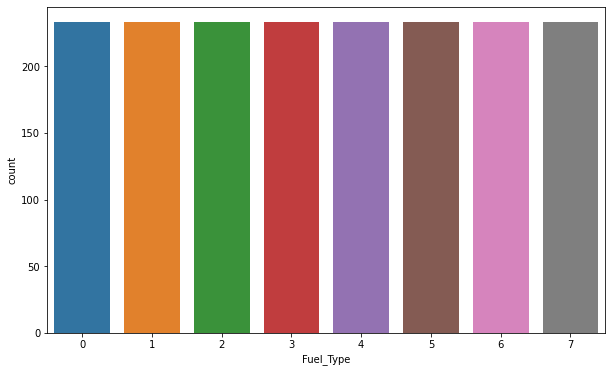

In [189]:
# Visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y)
plt.show()

## All my target variable are balanced Now .. 

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier


## Model Traning

In [192]:
max_acc=0
max_rand=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    preddt = dt.predict(x_test)
    acc=accuracy_score(y_test, preddt)
    if acc>max_acc:
        max_acc=acc
        max_rand=i
print("Best accuracy is ",max_acc," on Random_state ",max_rand)

print('cv :-' ,cross_val_score(dt,x,y,cv=5).mean())

Best accuracy is  0.9160714285714285  on Random_state  111
cv :- 0.8851927123872121


## Here we are getting 91% accuracy using Decision Tree Classifier.

In [194]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)

#Prediction
predsv = sv.predict(x_test)

print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

print('cv :-' ,cross_val_score(sv,x,y,cv=5).mean())

0.4517857142857143
[[64  0  0  1  3  0  0  5]
 [12 13  2 15 11  0  7  5]
 [ 5  0  1 24  6  4  1 28]
 [ 0  1  0 33  0  0  0 37]
 [ 5  9  0 22 25  0  0 12]
 [24  0  5  5  0 13  1 17]
 [16  0  0  4  0  0 47  6]
 [ 0  0  0 14  0  0  0 57]]
              precision    recall  f1-score   support

           0       0.51      0.88      0.64        73
           1       0.57      0.20      0.30        65
           2       0.12      0.01      0.03        69
           3       0.28      0.46      0.35        71
           4       0.56      0.34      0.42        73
           5       0.76      0.20      0.32        65
           6       0.84      0.64      0.73        73
           7       0.34      0.80      0.48        71

    accuracy                           0.45       560
   macro avg       0.50      0.44      0.41       560
weighted avg       0.50      0.45      0.41       560

cv :- 0.46083052264406577


## SVC is performing 45% which is performing very less as compared to other model

In [195]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

#Prediction
predkn = kn.predict(x_test)

print(accuracy_score(y_test, predkn))
print(confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

print('cv :-' ,cross_val_score(ad,x,y,cv=5).mean())

0.8339285714285715
[[67  0  2  0  0  2  2  0]
 [ 6 27  4  5 11  6  5  1]
 [ 1  2 60  0  1  3  1  1]
 [ 0  3  4 58  1  0  0  5]
 [ 1  1  1  0 69  0  0  1]
 [ 1  0  4  1  2 56  1  0]
 [ 1  7  3  1  0  2 59  0]
 [ 0  0  0  0  0  0  0 71]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        73
           1       0.68      0.42      0.51        65
           2       0.77      0.87      0.82        69
           3       0.89      0.82      0.85        71
           4       0.82      0.95      0.88        73
           5       0.81      0.86      0.84        65
           6       0.87      0.81      0.84        73
           7       0.90      1.00      0.95        71

    accuracy                           0.83       560
   macro avg       0.83      0.83      0.82       560
weighted avg       0.83      0.83      0.83       560

cv :- 0.05048228324984265


## KNeighborsClassifier is giving 81% which is good but still less than DTC

# `Ensemble Technique`

In [197]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

#Prediction
predrf = rfc.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('cv :-' ,cross_val_score(rfc,x,y,cv=5).mean())

0.9303571428571429
[[70  3  0  0  0  0  0  0]
 [ 5 48  2  2  6  2  0  0]
 [ 1  4 61  0  3  0  0  0]
 [ 0  5  4 62  0  0  0  0]
 [ 0  0  1  0 72  0  0  0]
 [ 0  1  0  0  0 64  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 71]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.79      0.74      0.76        65
           2       0.90      0.88      0.89        69
           3       0.97      0.87      0.92        71
           4       0.89      0.99      0.94        73
           5       0.97      0.98      0.98        65
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        71

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560

cv :- 0.9313341405056358


## RandomForestClassifier is 92% as a result which best till now

In [198]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)

#Prediction
predbc = bc.predict(x_test)

print(accuracy_score(y_test, predbc))
print(confusion_matrix(y_test, predbc))
print(classification_report(y_test,predbc))

0.9178571428571428
[[72  1  0  0  0  0  0  0]
 [ 5 48  2  1  6  3  0  0]
 [ 1  6 57  1  3  1  0  0]
 [ 0  8  5 58  0  0  0  0]
 [ 0  0  0  0 73  0  0  0]
 [ 0  2  0  0  0 63  0  0]
 [ 0  1  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0 71]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.73      0.74      0.73        65
           2       0.89      0.83      0.86        69
           3       0.97      0.82      0.89        71
           4       0.89      1.00      0.94        73
           5       0.94      0.97      0.95        65
           6       1.00      0.99      0.99        73
           7       1.00      1.00      1.00        71

    accuracy                           0.92       560
   macro avg       0.92      0.92      0.91       560
weighted avg       0.92      0.92      0.92       560



### Bagging Classifier is giving 91% whicg good but now better than Random Forest classifier

In [199]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

#Prediction
predad = ad.predict(x_test)

print(accuracy_score(y_test, predad))
print(confusion_matrix(y_test, predad))
print(classification_report(y_test,predad))

print('cv :-' ,cross_val_score(ad,x,y,cv=5).mean())

0.2910714285714286
[[ 0  0  0  0 70  3  0  0]
 [ 0 19  0  0 45  1  0  0]
 [ 0  5  0  0 61  3  0  0]
 [ 0 11  0  0 60  0  0  0]
 [ 0  1  0  0 72  0  0  0]
 [ 0  0  0  0 63  2  0  0]
 [ 0  3  0  0  0  0 70  0]
 [ 0  0  0  0  0 71  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.49      0.29      0.37        65
           2       0.00      0.00      0.00        69
           3       0.00      0.00      0.00        71
           4       0.19      0.99      0.32        73
           5       0.03      0.03      0.03        65
           6       1.00      0.96      0.98        73
           7       0.00      0.00      0.00        71

    accuracy                           0.29       560
   macro avg       0.21      0.28      0.21       560
weighted avg       0.22      0.29      0.22       560

cv :- 0.28218743693966386


### Adaboost is performing the least it just 29%

## I Will Choose random forest classifier as it is performing the best

# `Hyperparameter Tuning`

In [200]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [201]:
#RandomForestClassifier
parameters = {'bootstrap' : [True, False],'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[2,200],
             'max_depth':[2,3,4,6,7,8,10,12,14,16,18,20,22,24,26,28,30]}

In [202]:
qq=GridSearchCV(RandomForestClassifier(),parameters,cv=5)


In [203]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20,
                                       22, 24, 26, 28, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 200]})

In [204]:
qq.best_params_

{'bootstrap': False,
 'max_depth': 16,
 'max_features': 'auto',
 'n_estimators': 200}

In [205]:
rfc = RandomForestClassifier(bootstrap = False,max_depth=28, max_features='log2', n_estimators=200)
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

RMSE value: 0.46483484010068415
Accuracy_Score :->  93.92857142857143


## Soo Here my random forest classifier in hyperparameter tuning ,the accuracy is improved by 93%

# SAVE THE MODEL

In [206]:
#Saving the model using .pkl
import joblib
joblib.dump(rfc,"GPP_C.pkl")

['GPP_C.pkl']

In [207]:
#Loading the saved model
aa=joblib.load("GPP_C.pkl")

In [208]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([4, 2, 3, 5, 3, 3, 3, 7, 5, 0, 6, 0, 4, 7, 4, 2, 6, 0, 1, 5, 5, 2,
       6, 4, 1, 0, 3, 3, 0, 4, 5, 4, 4, 4, 7, 2, 4, 6, 1, 7, 5, 7, 3, 2,
       4, 0, 0, 4, 6, 2, 2, 1, 5, 7, 5, 5, 7, 6, 1, 5, 1, 4, 7, 5, 7, 5,
       5, 0, 0, 4, 4, 3, 5, 4, 4, 2, 6, 6, 0, 3, 0, 1, 6, 3, 5, 2, 7, 4,
       0, 4, 7, 6, 6, 4, 2, 4, 6, 6, 4, 7, 1, 1, 3, 5, 6, 0, 0, 1, 3, 4,
       0, 7, 4, 5, 2, 4, 2, 0, 2, 7, 7, 4, 3, 1, 5, 1, 3, 5, 1, 5, 3, 0,
       3, 5, 7, 4, 7, 4, 6, 3, 5, 0, 6, 1, 4, 4, 2, 3, 0, 3, 1, 3, 7, 2,
       2, 1, 6, 5, 5, 4, 7, 7, 0, 0, 2, 6, 7, 1, 7, 2, 4, 0, 7, 6, 7, 0,
       1, 0, 5, 4, 5, 3, 1, 7, 2, 2, 7, 6, 0, 5, 7, 4, 4, 1, 6, 5, 1, 6,
       3, 5, 6, 0, 7, 3, 0, 2, 0, 1, 5, 5, 2, 6, 0, 6, 5, 7, 7, 2, 1, 2,
       6, 6, 7, 1, 6, 1, 6, 0, 1, 4, 2, 5, 7, 3, 2, 7, 1, 6, 0, 1, 1, 0,
       6, 1, 3, 6, 0, 5, 7, 6, 4, 4, 1, 7, 3, 5, 3, 7, 2, 6, 1, 5, 3, 7,
       2, 6, 5, 0, 2, 0, 6, 5, 7, 5, 3, 3, 4, 6, 6, 0, 0, 0, 1, 1, 5, 3,
       0, 6, 2, 7, 7, 0, 4, 3, 4, 4, 0, 0, 4, 6, 5,

In [209]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559
Predicted,4,2,3,5,3,3,3,7,5,0,6,0,4,7,4,2,6,0,1,5,5,2,6,4,1,0,3,3,0,4,5,4,4,4,7,2,4,6,1,7,5,7,3,2,4,0,0,4,6,2,2,1,5,7,5,5,7,6,1,5,1,4,7,5,7,5,5,0,0,4,4,3,5,4,4,2,6,6,0,3,0,1,6,3,5,2,7,4,0,4,7,6,6,4,2,4,6,6,4,7,1,1,3,5,6,0,0,1,3,4,0,7,4,5,2,4,2,0,2,7,7,4,3,1,5,1,3,5,1,5,3,0,3,5,7,4,7,4,6,3,5,0,6,1,4,4,2,3,0,3,1,3,7,2,2,1,6,5,5,4,7,7,0,0,2,6,7,1,7,2,4,0,7,6,7,0,1,0,5,4,5,3,1,7,2,2,7,6,0,5,7,4,4,1,6,5,1,6,3,5,6,0,7,3,0,2,0,1,5,5,2,6,0,6,5,7,7,2,1,2,6,6,7,1,6,1,6,0,1,4,2,5,7,3,2,7,1,6,0,1,1,0,6,1,3,6,0,5,7,6,4,4,1,7,3,5,3,7,2,6,1,5,3,7,2,6,5,0,2,0,6,5,7,5,3,3,4,6,6,0,0,0,1,1,5,3,0,6,2,7,7,0,4,3,4,4,0,0,4,6,5,6,4,5,4,4,5,1,2,2,1,4,0,2,1,3,2,2,2,2,2,4,3,0,0,5,1,4,3,4,1,5,7,6,6,5,0,5,2,4,0,6,2,7,7,2,7,1,1,4,0,4,3,1,7,1,6,0,5,7,0,5,0,2,5,2,4,6,4,4,4,3,3,0,4,2,0,4,5,1,2,0,6,0,6,7,1,7,2,1,3,3,5,3,4,4,2,5,2,6,4,0,0,3,7,6,5,5,2,7,1,7,2,3,2,0,7,0,6,2,3,7,1,3,1,4,3,3,0,0,7,2,6,0,2,2,6,3,3,6,7,6,3,7,6,7,1,4,3,4,2,4,6,2,4,2,0,3,1,2,0,7,0,7,0,7,4,4,7,6,5,4,6,6,7,6,0,0,1,5,5,7,3,2,0,1,7,3,6,2,5,0,5,7,6,7,7,1,1,2,4,6,5,3,2,6,3,6,2,2,2,2,6,4,1,2,2,1,6,5,0,4,0,3,6,1,4,5,6,4,3,2,5,0,3,7,7,3,3,6,2,1,1,1,4,3,6,7,7,6,3,4,1,0,1,5,0,3,4,2
Original,4,2,3,5,3,3,3,7,5,0,6,0,4,7,4,2,6,0,1,5,5,2,6,4,1,0,3,3,0,4,5,4,4,4,7,2,4,6,1,7,5,7,3,2,4,0,0,4,6,2,2,1,5,7,5,5,7,6,1,5,0,4,7,5,7,5,5,0,0,4,4,1,5,4,4,2,6,6,0,3,0,1,6,3,5,2,7,4,0,4,7,6,6,4,2,4,6,6,4,7,1,1,3,5,6,0,0,3,3,4,1,7,4,5,2,4,2,0,2,7,7,4,3,1,5,1,3,5,1,5,3,0,3,5,7,4,7,4,6,3,5,0,6,1,4,4,1,3,0,3,1,3,7,2,2,2,6,5,5,2,7,7,0,0,2,6,7,1,7,2,4,0,7,6,7,0,0,0,5,4,5,3,1,7,2,2,7,6,0,5,7,1,4,4,6,5,1,6,3,5,6,0,7,3,1,3,0,1,5,5,2,6,0,6,5,7,7,2,1,2,6,6,7,1,6,1,6,0,1,4,2,5,7,3,2,7,1,6,1,1,3,0,6,1,3,6,0,5,7,6,1,4,1,7,3,5,3,7,3,6,1,5,3,7,2,6,5,0,2,0,6,5,7,5,3,3,4,6,6,0,0,0,1,1,5,3,0,6,2,7,7,0,4,1,4,4,0,0,4,6,5,6,4,5,4,4,5,0,2,2,1,4,0,2,1,3,2,2,2,1,2,4,3,0,0,5,2,4,3,4,1,5,7,6,6,2,0,5,2,1,0,6,2,7,7,2,7,2,3,1,0,4,3,1,7,1,6,0,5,7,0,5,0,2,5,

## Here we can see that model is performing the best over here with 93% accuracy_score

# -----------------------------------------------------------------------------------------------------------